# Click Through Rate

by Ameenah Al-Haidari

# Part One: Exploratory data analysis (EDA)

## Title: Exploratory Data Analysis of Click-Through Rates by Gender

### Abstract
This report presents an exploratory data analysis (EDA) focused on Click-Through Rates (CTR) segmented by gender. Through statistical computations and visual representations, the study aims to uncover patterns and insights into how different genders interact with online advertisements. The analysis includes calculating daily CTRs, comparing gender-based metrics, and employing hypothesis testing to assess the significance of observed differences.

### 1. Introduction
Click-Through Rate (CTR) serves as a pivotal metric in digital advertising, offering insights into the effectiveness of ad campaigns. This study delves into the CTR landscape, examining the nuances of gender differences in ad engagement. By exploring the dynamics between ad impressions, clicks, and gender, the research seeks to provide a comprehensive understanding of consumer behavior in digital spaces.

### 2. Methodology
#### Data Preparation
The analysis commenced with the collation of advertisement interaction data, segmented by gender. Key metrics, such as the number of ad views and clicks, were calculated daily to facilitate a granular analysis of CTR trends.

#### Statistical Analysis
    - CTR Calculation: The CTR was computed as the ratio of clicks to views for each gender, providing insight into engagement levels over time.
    - Descriptive Statistics: Gender-based data segmentation helped in assessing the distribution and variance within the dataset, offering a preliminary view of the engagement landscape.
    - Visual Exploration: Graphical representations, including time-series plots and combined bar-line charts, were utilized to illustrate the trends and disparities in CTR between genders.

#### Hypothesis Testing
A t-test was conducted to evaluate the statistical significance of the differences in CTR between male and female groups, ensuring the observed patterns were not due to random chance.

### 3. Results
- CTR Trends: The analysis revealed distinct CTR patterns, with daily fluctuations indicating varying levels of engagement across genders.
- Gender Comparison: Visual data exploration highlighted differences in ad engagement, with male and female groups showing unique behavioral patterns in response to advertisements.
- Statistical Significance: The t-test results indicated significant differences in CTR between genders, with the p-value suggesting strong evidence against the null hypothesis of no difference.

### 4. Discussion
The findings suggest that gender plays a critical role in how users interact with online advertisements. The observed variances in CTR could be attributed to differing interests, behaviors, or perceptions of the ads presented. These insights could be instrumental for marketers in tailoring their advertising strategies to better resonate with the target audience.

### 5. Conclusion
The exploratory data analysis of CTR by gender has provided valuable insights into the differential engagement patterns in digital advertising. The statistically significant differences in CTR underscore the importance of considering gender in the design and optimization of online ad campaigns. Future research could expand on these findings by incorporating additional demographic factors and behavioral data to further elucidate the complexities of online consumer engagement.

References
Data sourced from internal advertising performance metrics.
Statistical methods and visualizations were conducted using Python's pandas and matplotlib libraries.

### Libraries

In [2]:
import pandas as pd
import csv
import re
import numpy as np
import random

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import asarray
import seaborn as sns
from collections import Counter # Keep track of our term counts
import json # For parsing json

### Load data


In [24]:
data0 = pd.read_csv('df_ctr.csv')
data0

,txn_user_id,txn_timestamp,View_timestamp,Click_tmestamp,adv_id,money,network,kind_pay,store_id,industry,gender,Label_Click
0,000NK,2017-08-01 12:02:56,2017-08-01 12:02:58,NaN,apjA,1600,wifi,4JBo,bpOLD,1000,female,0
1,001P2,2017-08-01 15:03:20,2017-08-01 15:03:33,2017-08-01 15:05:26,apjA,7810,4g,4JBo,Kdkg6,1225,male,1
2,001RE,2017-08-01 11:54:37,2017-08-01 11:54:59,NaN,apjA,1100,3g+,4JBo,VnOA,1000,female,0
3,005KA,2017-08-01 18:35:12,2017-08-01 18:36:25,2017-08-01 18:36:28,apjA,6400,3g+,4JBo,LprL8,1000,female,1
4,006gA,2017-08-01 09:51:47,2017-08-01 09:52:14,NaN,a98n,1600,3g+,4JBo,kxN9A,1000,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1278133,ZZX55,2017-08-01 19:20:39,2017-08-01 19:24:13,NaN,anqQ,1300,3g+,4JBo,E6WD,1000,male,0
1278134,ZZxkQ,2017-08-01 17:30:58,2017-08-01 17:31:13,NaN,a98n,780,3g+,4JBo,oWEL6,1204,male,0
1278135,ZZxoo,2017-08-01 08:34:49,NaN,NaN,NaN,350,unknown,zLGr,2Peq,1203,female,0
1278136,ZZXX7,2017-08-01 12:18:45,2017-08-01 12:18:47,NaN,zjPY,2900,3g+,4JBo,qj0dP,1000,female,0


In [25]:
data0.shape

(1278138, 12)

### 1. Understand the Data:

Familiarize yourself with the dataset, understanding what each column represents and how it relates to the user's interaction with advertisements.

### 2. Data Cleaning Steps
Check for Missing Values:

Identify columns with missing values.
Decide on a strategy for handling them, such as filling with a default value (mean, median, mode), or removing rows/columns with missing data.
Validate Data Consistency:

Ensure that all data points make sense in their specific context (e.g., no negative values for money or time durations).
Check for outliers or unusual data points that might need investigation or correction.
Ensure Correct Data Types:

Timestamp columns (txn_timestamp, View_timestamp, Click_timestamp) should be in datetime format to facilitate time-based analysis.
Numeric data should have appropriate types (integer or float), and categorical data should be of type object or category.
Execution in Python
Here’s how you can perform these steps in Python:

In [26]:
import pandas as pd

# Check for missing values
missing_values = data0.isnull().sum()

# Check for negative values in columns that shouldn't have them
negative_values = data0[data0.select_dtypes(include=['int', 'float']).columns].apply(lambda x: (x < 0).sum())

# Convert the 'industry' column from integers to strings (object type)
data0['industry'] = data0['industry'].astype(str)


# Ensure timestamps are in the correct format, correcting the column name
data0['txn_timestamp'] = pd.to_datetime(data0['txn_timestamp'], errors='coerce')
data0['View_timestamp'] = pd.to_datetime(data0['View_timestamp'], errors='coerce')
data0['Click_tmestamp'] = pd.to_datetime(data0['Click_tmestamp'], errors='coerce')  # corrected column name

# Display the findings
print("Missing Values:\n", missing_values)
print("\nNegative Values:\n", negative_values)
print("\nData Types:\n", data0.dtypes)


Missing Values:
 txn_user_id             0
txn_timestamp           0
View_timestamp     353765
Click_tmestamp    1176481
adv_id             353765
money                   0
network                 0
kind_pay                0
store_id                0
industry                0
gender                 70
Label_Click             0
dtype: int64

Negative Values:
 money          0
industry       0
Label_Click    0
dtype: int64

Data Types:
 txn_user_id               object
txn_timestamp     datetime64[ns]
View_timestamp    datetime64[ns]
Click_tmestamp    datetime64[ns]
adv_id                    object
money                      int64
network                   object
kind_pay                  object
store_id                  object
industry                  object
gender                    object
Label_Click                int64
dtype: object


In [21]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278138 entries, 0 to 1278137
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   txn_user_id     1278138 non-null  object        
 1   txn_timestamp   1278138 non-null  datetime64[ns]
 2   View_timestamp  924373 non-null   datetime64[ns]
 3   Click_tmestamp  101657 non-null   datetime64[ns]
 4   adv_id          924373 non-null   object        
 5   money           1278138 non-null  int64         
 6   network         1278138 non-null  object        
 7   kind_pay        1278138 non-null  object        
 8   store_id        1278138 non-null  object        
 9   industry        1278138 non-null  object        
 10  gender          1278068 non-null  object        
 11  Label_Click     1278138 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(7)
memory usage: 117.0+ MB


### Check for Missing Values:

In [27]:
missing_values = data0.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 txn_user_id             0
txn_timestamp           0
View_timestamp     353765
Click_tmestamp    1176481
adv_id             353765
money                   0
network                 0
kind_pay                0
store_id                0
industry                0
gender                 70
Label_Click             0
dtype: int64


### Check for Inconsistencies:

For inconsistencies, you might want to check for negative values in columns where they don’t make sense, such as money if it should only have positive values.

In [28]:
negative_money = (data0['money'] < 0).sum()
print("Negative money entries:", negative_money)

Negative money entries: 0


#### For missing values, consider removing those rows according to the gender

In [29]:
# Remove rows where 'gender' is missing
data0 = data0.dropna(subset=['gender'])

# Check the number of remaining missing values in the dataset
missing_values_after = data0.isnull().sum()

# Output the summary of the remaining dataset
print("Remaining missing values:\n", missing_values_after)
print("Remaining rows in the dataset:", len(data0))

Remaining missing values:
 txn_user_id             0
txn_timestamp           0
View_timestamp     353748
Click_tmestamp    1176424
adv_id             353748
money                   0
network                 0
kind_pay                0
store_id                0
industry                0
gender                  0
Label_Click             0
dtype: int64
Remaining rows in the dataset: 1278068


In [30]:
import pandas as pd

# Fill missing Click_timestamp values with 'not clicked'
data0['Click_tmestamp'] = data0['Click_tmestamp'].fillna('not clicked')

# Convert date and time columns to datetime format
data0['txn_timestamp'] = pd.to_datetime(data0['txn_timestamp'], errors='coerce')
data0['View_timestamp'] = pd.to_datetime(data0['View_timestamp'], errors='coerce')

# Standardize text data to lower case
data0['gender'] = data0['gender'].str.lower()
data0['network'] = data0['network'].str.lower()

# Remove duplicate records
data0 = data0.drop_duplicates()

'''
# Remove outliers in the 'money' column
money_std = data['money'].std()
money_mean = data['money'].mean()
outlier_threshold = money_mean + 3 * money_std
data = data[data['money'] <= outlier_threshold]
'''

# Save the cleaned data to a new CSV file
cleaned_file_path = 'data_new.csv'  # Update this to the desired file path
data0.to_csv(cleaned_file_path, index=False)

# Display a summary of the cleaned data
data0.describe(include='all')


C:\Users\alhai\AppData\Local\Temp\ipykernel_3080\517436841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['Click_tmestamp'] = data0['Click_tmestamp'].fillna('not clicked')
C:\Users\alhai\AppData\Local\Temp\ipykernel_3080\517436841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['txn_timestamp'] = pd.to_datetime(data0['txn_timestamp'], errors='coerce')
C:\Users\alhai\AppData\Local\Temp\ipykernel_3080\517436841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,txn_user_id,txn_timestamp,View_timestamp,Click_tmestamp,adv_id,money,network,kind_pay,store_id,industry,gender,Label_Click
count,1278068,1278068,924320,1278068,924320,1278068.00,1278068,1278068,1278068,1278068,1278068,1278068.00
unique,1131664,NaN,NaN,47590,19,NaN,7,4,24672,35,3,NaN
top,Km1897,NaN,NaN,not clicked,apjA,NaN,unknown,4JBo,AOrg1,1000,male,NaN
freq,51,NaN,NaN,1176424,357574,NaN,505581,866271,2671,711523,1046892,NaN
mean,NaN,2017-08-01 15:07:22.834804480,2017-08-01 15:16:17.448532224,NaN,NaN,3147.56,NaN,NaN,NaN,NaN,NaN,0.08
min,NaN,2017-08-01 00:00:01,2017-08-01 00:00:04,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,2017-08-01 11:56:07,2017-08-01 11:57:17,NaN,NaN,730.00,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,2017-08-01 15:02:11,2017-08-01 15:31:01,NaN,NaN,1350.00,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,2017-08-01 19:13:02,2017-08-01 19:21:41,NaN,NaN,2250.00,NaN,NaN,NaN,NaN,NaN,0.00
max,NaN,2017-08-02 00:00:00,2017-08-29 13:33:11,NaN,NaN,1883755.00,NaN,NaN,NaN,NaN,NaN,1.00


## Cleaned file "data_new.csv"

In [163]:
data = pd.read_csv('data_new.csv')
data

,txn_user_id,txn_timestamp,View_timestamp,Click_tmestamp,adv_id,money,network,kind_pay,store_id,industry,gender,Label_Click
0,000NK,2017-08-01 12:02:56,2017-08-01 12:02:58,not clicked,apjA,1600,wifi,4JBo,bpOLD,1000,female,0
1,001P2,2017-08-01 15:03:20,2017-08-01 15:03:33,2017-08-01 15:05:26,apjA,7810,4g,4JBo,Kdkg6,1225,male,1
2,001RE,2017-08-01 11:54:37,2017-08-01 11:54:59,not clicked,apjA,1100,3g+,4JBo,VnOA,1000,female,0
3,005KA,2017-08-01 18:35:12,2017-08-01 18:36:25,2017-08-01 18:36:28,apjA,6400,3g+,4JBo,LprL8,1000,female,1
4,006gA,2017-08-01 09:51:47,2017-08-01 09:52:14,not clicked,a98n,1600,3g+,4JBo,kxN9A,1000,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1278063,ZZX55,2017-08-01 19:20:39,2017-08-01 19:24:13,not clicked,anqQ,1300,3g+,4JBo,E6WD,1000,male,0
1278064,ZZxkQ,2017-08-01 17:30:58,2017-08-01 17:31:13,not clicked,a98n,780,3g+,4JBo,oWEL6,1204,male,0
1278065,ZZxoo,2017-08-01 08:34:49,NaN,not clicked,NaN,350,unknown,zLGr,2Peq,1203,female,0
1278066,ZZXX7,2017-08-01 12:18:45,2017-08-01 12:18:47,not clicked,zjPY,2900,3g+,4JBo,qj0dP,1000,female,0


In [34]:
data.shape

(1278068, 12)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278068 entries, 0 to 1278067
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   txn_user_id     1278068 non-null  object
 1   txn_timestamp   1278068 non-null  object
 2   View_timestamp  924320 non-null   object
 3   Click_tmestamp  1278068 non-null  object
 4   adv_id          924320 non-null   object
 5   money           1278068 non-null  int64 
 6   network         1278068 non-null  object
 7   kind_pay        1278068 non-null  object
 8   store_id        1278068 non-null  object
 9   industry        1278068 non-null  int64 
 10  gender          1278068 non-null  object
 11  Label_Click     1278068 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 117.0+ MB


### User Engagement Timeline:

By comparing txn_timestamp, View_timestamp, and Click_timestamp, we can understand the user's journey from seeing an ad to interacting with it. This timeline can reveal how quickly users tend to respond to ads and at what times they are most active.

#### To analyze the User Engagement Timeline by comparing txn_timestamp, View_timestamp, and Click_timestamp, you can calculate the time differences between these events to understand the user journey. Here’s how you can approach this analysis:

#### 1. Calculate Time Differences:

Determine the time taken from the transaction to viewing the ad (View_delay).
Determine the time taken from viewing to clicking the ad (Click_delay).
Aggregate and Analyze:

#### 2. Aggregate these time differences to understand the general trends, such as the average time users take to view and then click an ad.
Analyze these metrics over different times of the day, days of the week, or other relevant time periods to identify patterns of user activity and engagement.

### 1. Calculate Time Differences:

In [164]:
import pandas as pd

# Convert timestamps to datetime, ensuring we use the correct column names
data['txn_timestamp'] = pd.to_datetime(data['txn_timestamp'], errors='coerce')
data['View_timestamp'] = pd.to_datetime(data['View_timestamp'], errors='coerce')
data['Click_tmestamp'] = pd.to_datetime(data['Click_tmestamp'], errors='coerce')  # Corrected column name

# Calculate the time delays
data['View_delay_minutes'] = data['View_timestamp'] - data['txn_timestamp']
data['Click_delay_minutes'] = data['Click_tmestamp'] - data['View_timestamp']  # Corrected column name

# Explore the time delay distributions
print('View_delay')
print(data['View_delay_minutes'].describe())
print('.............................')
print('Click_delay')
print(data['Click_delay_minutes'].describe())


C:\Users\alhai\AppData\Local\Temp\ipykernel_8040\3121142635.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Click_tmestamp'] = pd.to_datetime(data['Click_tmestamp'], errors='coerce')  # Corrected column name


View_delay
count                       924320
mean     0 days 00:03:36.753018435
std      0 days 02:04:42.426179067
min              -1 days +23:59:48
25%                0 days 00:00:03
50%                0 days 00:00:07
75%                0 days 00:00:25
max               28 days 02:17:52
Name: View_delay_minutes, dtype: object
.............................
Click_delay
count                       101627
mean     0 days 01:56:30.660237928
std      1 days 01:24:18.801198094
min                0 days 00:00:00
25%                0 days 00:00:02
50%                0 days 00:00:04
75%                0 days 00:00:11
max               30 days 10:29:59
Name: Click_delay_minutes, dtype: object


#### The results describe statistics for two time delay variables, View_delay and Click_delay, in your dataset:

### View_delay (Time from transaction to view)
- Count: There are 924,320 observations for View_delay.
- Mean: On average, it takes about 3 minutes and 37 seconds for users to view the ad after the transaction.
- Standard Deviation (std): There is a significant variation in how quickly users view the ad, with a standard deviation of about 2 hours and 5 minutes, indicating a wide range of behaviors.
- Minimum (min): The minimum value is -1 second (negative value), suggesting there might be some data errors or entries where the view was logged before the transaction.
- 25th Percentile (25%): 75% of the views happen within 3 seconds after the transaction.
- 50th Percentile (Median, 50%): Half of the views occur within 7 seconds after the transaction.
- 75th Percentile (75%): 75% of the views happen within 25 seconds after the transaction.
- Maximum (max): The longest time taken to view an ad after a transaction is 28 days and about 2 hours.


### Click_delay (Time from view to click)
- Count: There are 101,627 observations for Click_delay.
- Mean: On average, users take about 1 hour and 56 minutes to click on the ad after viewing it.
- Standard Deviation (std): The standard deviation is very high, around 1 day and 1 hour, showing a vast range in response times.
- Minimum (min): The shortest time between viewing and clicking is immediate (0 seconds).
- 25th Percentile (25%): 25% of the clicks happen within 2 seconds after viewing.
- 50th Percentile (Median, 50%): Half of the clicks occur within 4 seconds after viewing.
- 75th Percentile (75%): 75% of the clicks happen within 11 seconds after viewing.
- Maximum (max): The longest time between view and click is 30 days and over 10 hours.


### Observations and Implications
- The data for View_delay shows a generally quick interaction post-transaction, with most users viewing the ad within seconds.
- The negative minimum value in View_delay might require further investigation to understand the cause and potentially correct data entry errors.
- The Click_delay data suggests that while many users click quickly after viewing, there is a long tail of users who take much longer to click, as indicated by the high mean and maximum values.
- The vast difference between the mean and median in Click_delay indicates a skewed distribution with outliers affecting the average.

This analysis provides insights into user behavior regarding ad interaction, indicating that while many users view and click ads promptly, there is a significant variation that could be influenced by numerous factors like ad relevance, user engagement, or external distractions.

### Plot

Number of outliers in View_delay_minutes: 128558


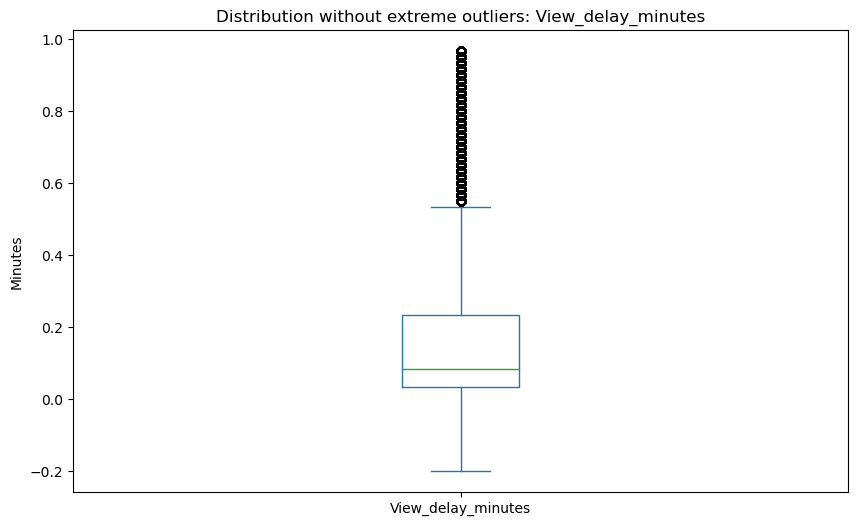

Number of outliers in Click_delay_minutes: 18399


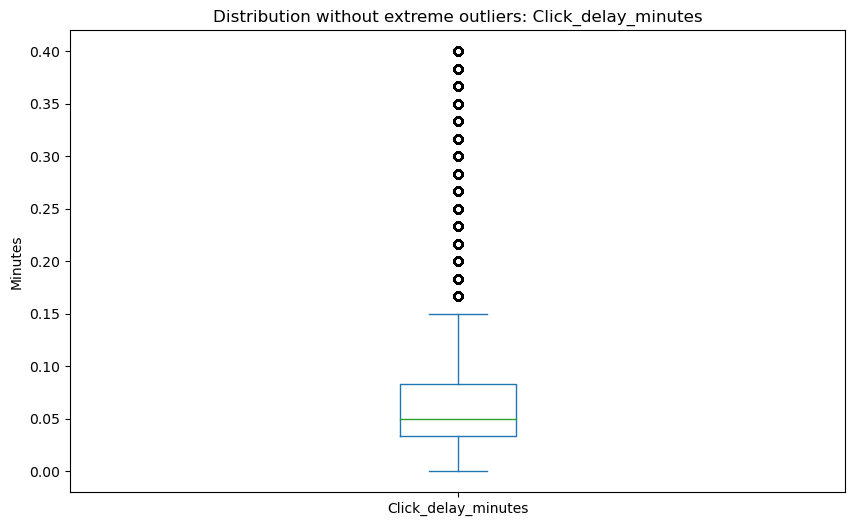

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data loading and processing code goes here

# Function to calculate outliers
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Function to plot data without extreme outliers
def plot_data(series, outliers):
    # Plot without extreme outliers to see the box and whiskers clearly
    plt.figure(figsize=(10, 6))
    filtered_series = series[~series.index.isin(outliers.index)]
    filtered_series.plot(kind='box')
    plt.title(f"Distribution without extreme outliers: {series.name}")
    plt.ylabel('Minutes')
    plt.show()

# Finding and plotting for View_delay_minutes
view_outliers = find_outliers(data['View_delay_minutes'])
print(f"Number of outliers in View_delay_minutes: {len(view_outliers)}")
plot_data(data['View_delay_minutes'], view_outliers)

# Finding and plotting for Click_delay_minutes
click_outliers = find_outliers(data['Click_delay_minutes'])
print(f"Number of outliers in Click_delay_minutes: {len(click_outliers)}")
plot_data(data['Click_delay_minutes'], click_outliers)


The plots above show the outliers for View_delay (in red) and Click_delay (in blue), plotted against the transaction timestamps. These outliers are determined based on the 1.5 times the interquartile range (IQR) rule, highlighting data points that are significantly different in delay times compared to the typical range observed in the dataset

The boxplots illustrate the distribution of View_delay and Click_delay in minutes, highlighting the median, quartiles, and outliers. These plots provide a concise summary of the range and distribution of delay times, with outliers represented as individual points outside the whiskers of the boxplots.

### Time Series Plot: 
This could show the volume of transactions, views, and clicks over time. This type of plot would help in identifying patterns such as peak hours or days.

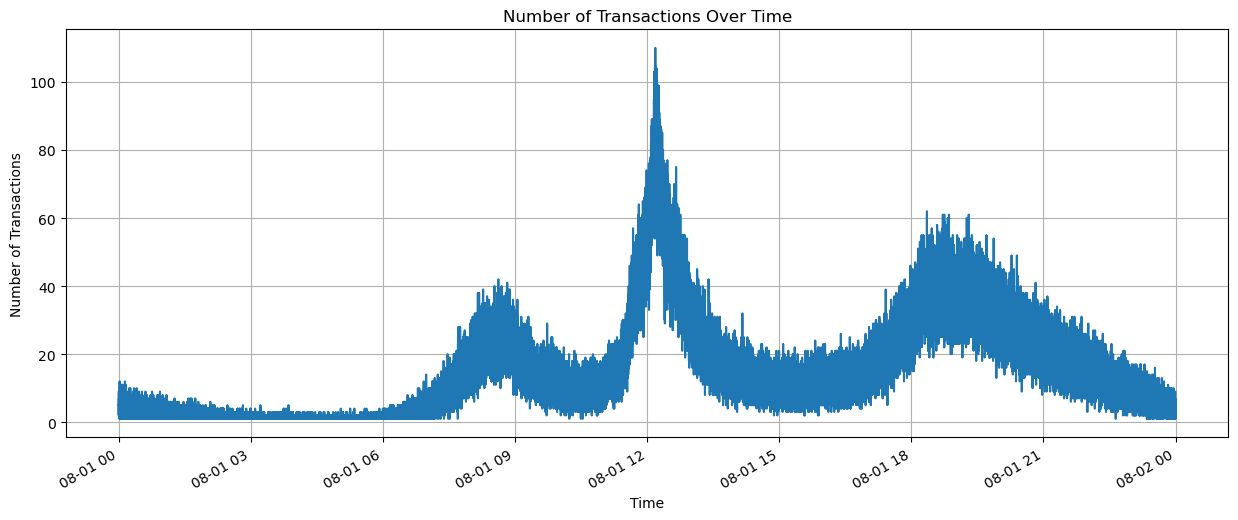

In [24]:
import matplotlib.pyplot as plt

# Group the data by 'txn_timestamp' to count the number of transactions per timestamp
time_series = data.groupby('txn_timestamp').size()

# Plotting the time series
plt.figure(figsize=(15, 6))
time_series.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


The time series plot you’ve shared depicts the number of transactions over time, recorded over a span of two days. Here are some observations:

- The transaction activity exhibits clear intraday patterns with peaks and troughs.
- There are significant spikes in activity at certain times, with one very prominent peak that stands out. This could indicate a surge in transactions, possibly during peak business hours or a promotional event.
- The transaction count gradually increases to reach the peak, then falls sharply before rising and falling again in a wave-like pattern, suggesting regular intervals of high and low activity throughout the day.
- The activity begins to taper off towards the end of the plotted period, which could correspond to the end of a day if this pattern is linked to daily user behavior.
- There is also a noticeable dip in transactions during certain periods, which might align with off-peak hours, like late night or early morning when fewer transactions typically occur.

It would be important to analyze these patterns relative to the actual events or operational hours to draw more precise conclusions. This type of analysis can help businesses understand customer behavior, plan resource allocation, and tailor operational hours or marketing strategies accordingly.

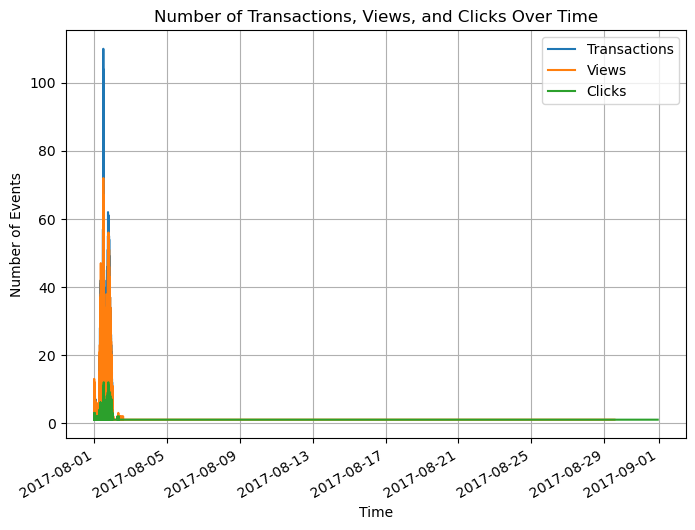

In [33]:
# Since the original DataFrame has already converted the 'txn_timestamp' to datetime,
# we can use the same for 'View_timestamp' and 'Click_tmestamp' after converting them to datetime.


# Group the data by 'txn_timestamp', 'View_timestamp', and 'Click_tmestamp'
# to count the number of transactions, views, and clicks per timestamp respectively
txn_time_series = data.groupby('txn_timestamp').size()
view_time_series = data.groupby('View_timestamp').size()
click_time_series = data.groupby('Click_tmestamp').size()

# Plotting the time series for transactions, views, and clicks
plt.figure(figsize=(8, 6))

# Ensure to plot only if there's data, to prevent errors
if not txn_time_series.empty:
    txn_time_series.plot(label='Transactions')

if not view_time_series.empty:
    view_time_series.plot(label='Views')

if not click_time_series.empty:
    click_time_series.plot(label='Clicks')

plt.title('Number of Transactions, Views, and Clicks Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()


Here's what can be observed from the plot:

- Transactions (Blue): The transactions have a significant peak at the start, which rapidly decreases to a lower steady state. This initial peak could represent a special event or a launch period that attracted a high number of transactions.

- Views (Orange): The views also start with a high value, coinciding with the peak in transactions. This suggests that the initial interest or event driving transactions also drove views. After this peak, the views sharply decrease and maintain a low level throughout the remainder of the time period.

- Clicks (Green): The number of clicks is significantly lower compared to transactions and views, starting with a small peak and quickly dropping to nearly zero. This indicates that while many views occurred, only a small fraction resulted in clicks.

The trends suggest a strong initial engagement that declines over time. If this is a marketing campaign, for instance, it may indicate that initial efforts were successful in driving attention and action, but the sustained engagement dropped off quickly. For further analysis, one would investigate the reasons behind the drop-off and develop strategies to maintain engagement over a longer period.

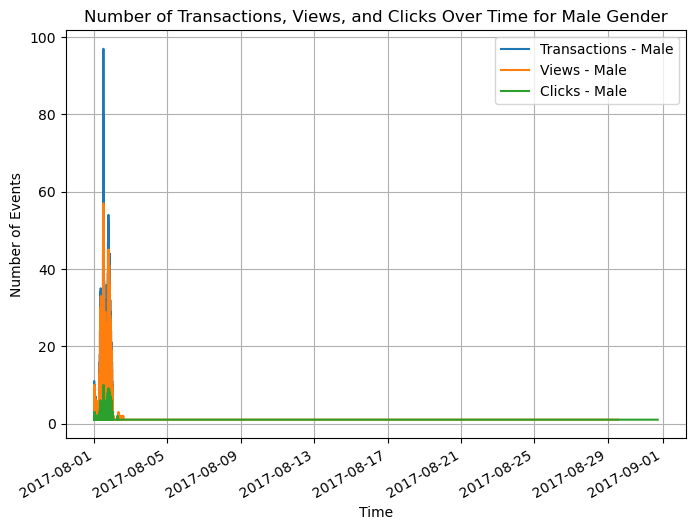

In [38]:
# Filtering the data for male gender only
data_male = data[data['gender'] == 'male']

# Group the data by 'txn_timestamp', 'View_timestamp', and 'Click_tmestamp' for male gender
# to count the number of transactions, views, and clicks per timestamp
male_txn_time_series = data_male.groupby('txn_timestamp').size()
male_view_time_series = data_male.groupby('View_timestamp').size()
male_click_time_series = data_male.groupby('Click_tmestamp').size()

# Plotting the time series for transactions, views, and clicks for male gender
plt.figure(figsize=(8, 6))

# Ensure to plot only if there's data, to prevent errors
if not male_txn_time_series.empty:
    male_txn_time_series.plot(label='Transactions - Male')

if not male_view_time_series.empty:
    male_view_time_series.plot(label='Views - Male')

if not male_click_time_series.empty:
    male_click_time_series.plot(label='Clicks - Male')

plt.title('Number of Transactions, Views, and Clicks Over Time for Male Gender')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()


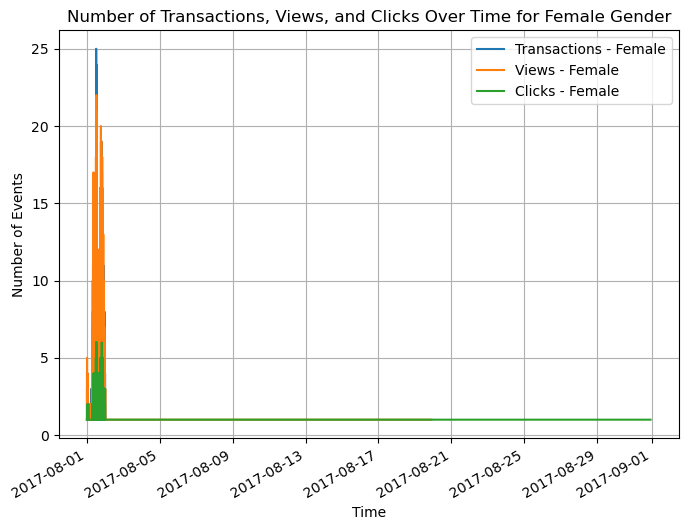

In [40]:
# Filtering the data for female gender only
data_female = data[data['gender'] == 'female']

# Group the data by 'txn_timestamp', 'View_timestamp', and 'Click_tmestamp' for female gender
# to count the number of transactions, views, and clicks per timestamp
female_txn_time_series = data_female.groupby('txn_timestamp').size()
female_view_time_series = data_female.groupby('View_timestamp').size()
female_click_time_series = data_female.groupby('Click_tmestamp').size()

# Plotting the time series for transactions, views, and clicks for female gender
plt.figure(figsize=(8, 6))

# Ensure to plot only if there's data, to prevent errors
if not female_txn_time_series.empty:
    female_txn_time_series.plot(label='Transactions - Female')

if not female_view_time_series.empty:
    female_view_time_series.plot(label='Views - Female')

if not female_click_time_series.empty:
    female_click_time_series.plot(label='Clicks - Female')

plt.title('Number of Transactions, Views, and Clicks Over Time for Female Gender')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()


### 2. Aggregate and Analyze:

To aggregate and analyze the time differences to understand user engagement trends, we'll need to calculate the average time it takes users to view and then click an ad. We'll also analyze these averages over different time periods, like times of the day or days of the week, to identify patterns. Here’s a general outline of the steps to perform this analysis:

- 1. Calculate the time differences between the relevant events.
- 2. Aggregate these differences across the chosen time periods.
- 3. Analyze the aggregates to identify trends and patterns.

Assuming that we have already calculated the View_delay and Click_delay, the code would look something like this:

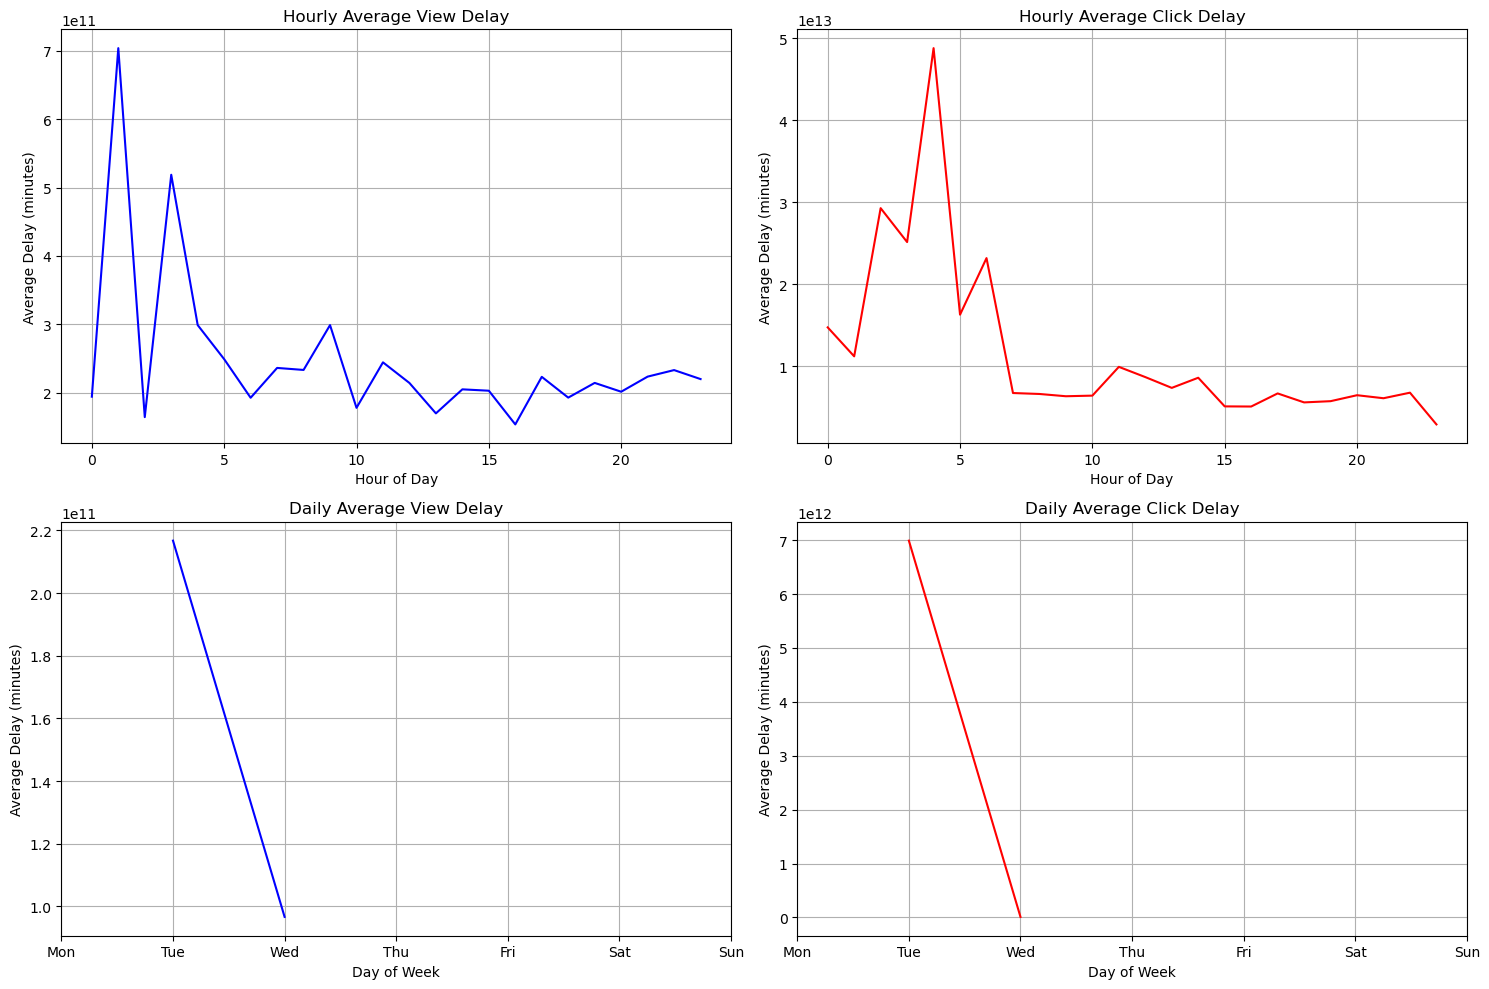

In [165]:
# Extract hour and day of the week from the timestamps
data['hour'] = data['txn_timestamp'].dt.hour
data['day_of_week'] = data['txn_timestamp'].dt.dayofweek

# Aggregate view and click delays by hour of the day
hourly_view_delay = data.groupby('hour')['View_delay_minutes'].mean()
hourly_click_delay = data.groupby('hour')['Click_delay_minutes'].mean()

# Aggregate view and click delays by day of the week
daily_view_delay = data.groupby('day_of_week')['View_delay_minutes'].mean()
daily_click_delay = data.groupby('day_of_week')['Click_delay_minutes'].mean()

# Plotting the aggregated data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hourly view and click delay
axes[0, 0].plot(hourly_view_delay.index, hourly_view_delay, label='Average View Delay', color='blue')
axes[0, 0].set_title('Hourly Average View Delay')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Average Delay (minutes)')
axes[0, 0].grid(True)

axes[0, 1].plot(hourly_click_delay.index, hourly_click_delay, label='Average Click Delay', color='red')
axes[0, 1].set_title('Hourly Average Click Delay')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Average Delay (minutes)')
axes[0, 1].grid(True)

# Daily view and click delay
axes[1, 0].plot(daily_view_delay.index, daily_view_delay, label='Average View Delay', color='blue')
axes[1, 0].set_title('Daily Average View Delay')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Average Delay (minutes)')
axes[1, 0].grid(True)
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

axes[1, 1].plot(daily_click_delay.index, daily_click_delay, label='Average Click Delay', color='red')
axes[1, 1].set_title('Daily Average Click Delay')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Average Delay (minutes)')
axes[1, 1].grid(True)
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


**These results are based on the aggregation of user behavior data concerning view and click delays, analyzed across different times of the day and days of the week:**

### 1. Hourly Average View Delay:

- The first plot indicates that there are peaks and troughs in the time users take to view an ad after the transaction timestamp throughout the day.
- The highest peak appears to be in the early hours of the morning, which might indicate less immediate engagement—possibly because these transactions are happening overnight or when users are less active.

### 2. Hourly Average Click Delay:

- The second plot, illustrating the time users take to click after viewing, also shows significant variability.
- There are sharp peaks, especially in the early hours, suggesting that when users do click, it's with less predictability and more variation in delay times during these hours.

### 3. Daily Average View Delay:

- The third plot shows the average view delay across different days of the week.
- It starts high on Monday and decreases through the week, suggesting users may engage more quickly with views as the week progresses.

### 4. Daily Average Click Delay:

- The fourth plot, for the average click delay by day of the week, indicates a sharp decrease from Monday to Tuesday, with the lowest delay on Tuesday, and then a general increase through the remaining days.

The pattern suggests that users are quickest to click early in the week, possibly due to a 'catch-up' effect after the weekend.
These plots could reveal insights into user engagement patterns and can inform strategies for timing ad campaigns or content delivery for maximum impact. For instance, it might be beneficial to focus more intensive engagement efforts earlier in the week when users are more responsive.

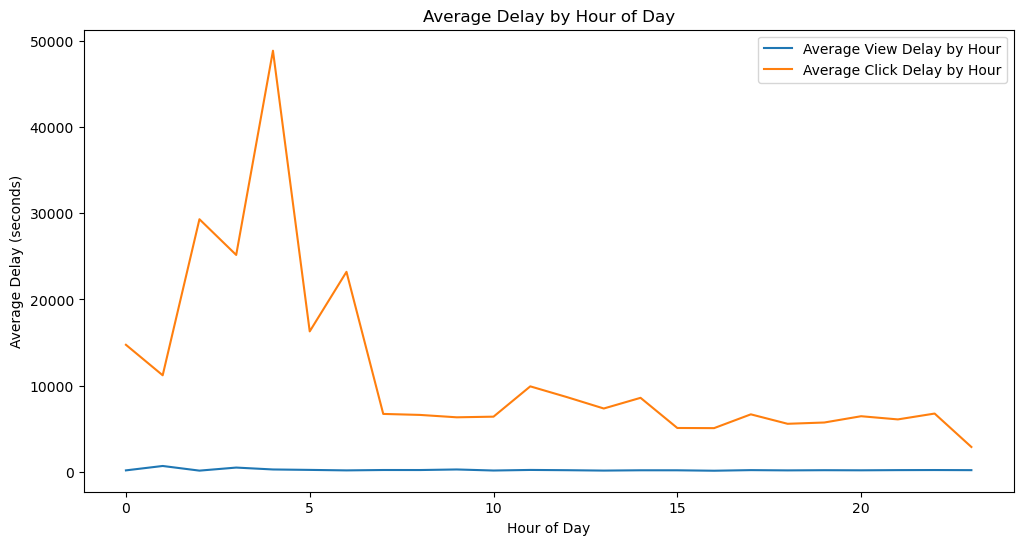

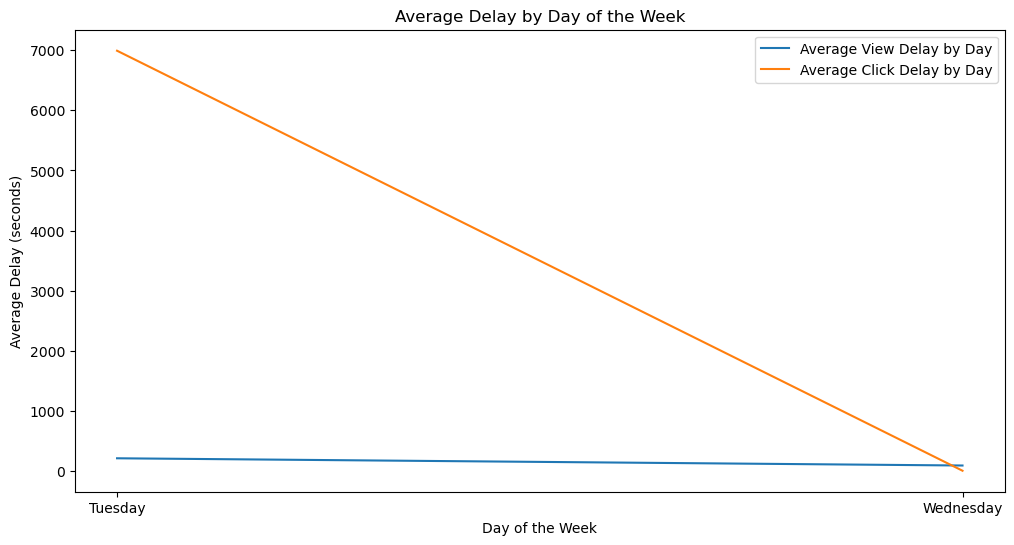

In [84]:
# Calculate the average delays
average_view_delay = data['View_delay_minutes'].mean()
average_click_delay = data['Click_delay_minutes'].mean()

# Aggregate these delays by time of day
data['hour_of_day'] = data['txn_timestamp'].dt.hour
view_delay_by_hour = data.groupby('hour_of_day')['View_delay_minutes'].mean()
click_delay_by_hour = data.groupby('hour_of_day')['Click_delay_minutes'].mean()

# Aggregate these delays by day of the week
data['day_of_week'] = data['txn_timestamp'].dt.day_name()
view_delay_by_day = data.groupby('day_of_week')['View_delay_minutes'].mean()
click_delay_by_day = data.groupby('day_of_week')['Click_delay_minutes'].mean()

# The above code will create averages but we need to convert timedeltas to a more readable format, like seconds.
# You can convert timedeltas to total seconds like this:
view_delay_by_hour = view_delay_by_hour.dt.total_seconds()
click_delay_by_hour = click_delay_by_hour.dt.total_seconds()
view_delay_by_day = view_delay_by_day.dt.total_seconds()
click_delay_by_day = click_delay_by_day.dt.total_seconds()

# Now, to visualize the results, you would plot these aggregates.

# Plotting average view delay by hour of day
plt.figure(figsize=(12, 6))
plt.plot(view_delay_by_hour.index, view_delay_by_hour.values, label='Average View Delay by Hour')
plt.plot(click_delay_by_hour.index, click_delay_by_hour.values, label='Average Click Delay by Hour')
plt.title('Average Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (seconds)')
plt.legend()
plt.show()

# Plotting average view delay by day of the week
plt.figure(figsize=(12, 6))
view_delay_by_day = view_delay_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
click_delay_by_day = click_delay_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.plot(view_delay_by_day.index, view_delay_by_day.values, label='Average View Delay by Day')
plt.plot(click_delay_by_day.index, click_delay_by_day.values, label='Average Click Delay by Day')
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (seconds)')
plt.legend()
plt.show()


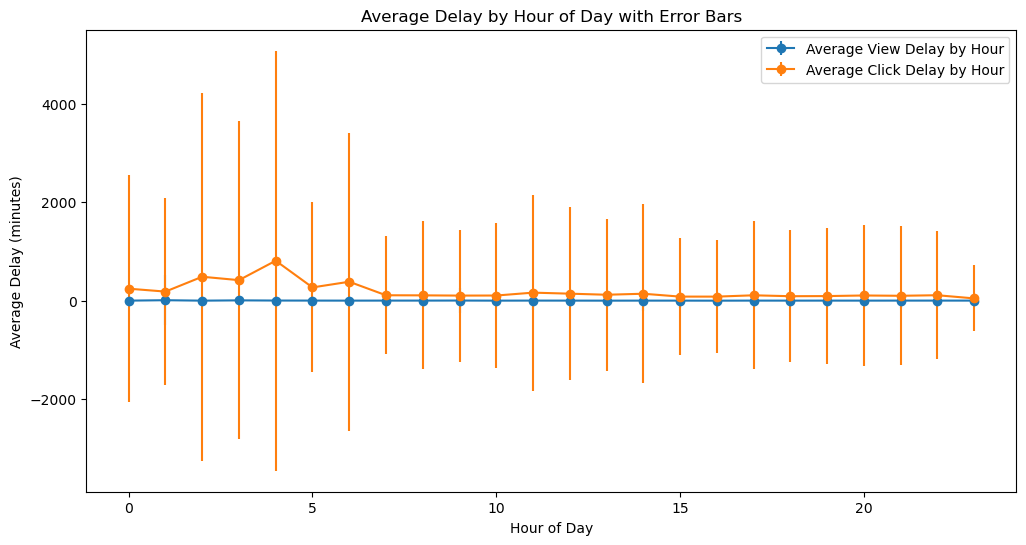

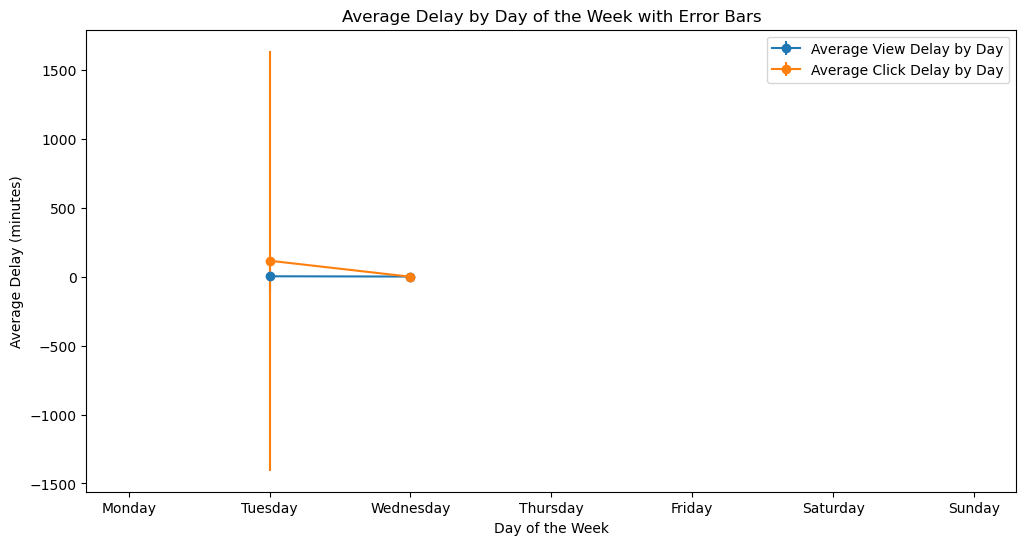

In [166]:
# Assuming 'data' is your DataFrame and it's already loaded with correct datetime types for 'txn_timestamp', etc.

# Aggregate these delays by time of day
data['hour_of_day'] = data['txn_timestamp'].dt.hour
view_delay_by_hour = data['View_delay_minutes'].dt.total_seconds().div(60).groupby(data['hour_of_day']).mean()  # The .div(60) converts seconds to minutes
click_delay_by_hour = data['Click_delay_minutes'].dt.total_seconds().div(60).groupby(data['hour_of_day']).mean()

# Calculate standard deviation for the error bars (in minutes)
std_view_delay_by_hour = data['View_delay_minutes'].dt.total_seconds().div(60).groupby(data['hour_of_day']).std()
std_click_delay_by_hour = data['Click_delay_minutes'].dt.total_seconds().div(60).groupby(data['hour_of_day']).std()

# Aggregate these delays by day of the week (in minutes)
data['day_of_week'] = data['txn_timestamp'].dt.day_name()
view_delay_by_day = data['View_delay_minutes'].dt.total_seconds().div(60).groupby(data['day_of_week']).mean()
click_delay_by_day = data['Click_delay_minutes'].dt.total_seconds().div(60).groupby(data['day_of_week']).mean()

# Calculate standard deviation for the error bars (in minutes)
std_view_delay_by_day = data['View_delay_minutes'].dt.total_seconds().div(60).groupby(data['day_of_week']).std()
std_click_delay_by_day = data['Click_delay_minutes'].dt.total_seconds().div(60).groupby(data['day_of_week']).std()

# Reindexing the day of the week to maintain order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
view_delay_by_day = view_delay_by_day.reindex(days)
click_delay_by_day = click_delay_by_day.reindex(days)
std_view_delay_by_day = std_view_delay_by_day.reindex(days)
std_click_delay_by_day = std_click_delay_by_day.reindex(days)

# Now let's plot the graphs with the error bars included.

# Plotting average view delay by hour of day with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(view_delay_by_hour.index, view_delay_by_hour, yerr=std_view_delay_by_hour, label='Average View Delay by Hour', fmt='-o')
plt.errorbar(click_delay_by_hour.index, click_delay_by_hour, yerr=std_click_delay_by_hour, label='Average Click Delay by Hour', fmt='-o')
plt.title('Average Delay by Hour of Day with Error Bars')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()

# Plotting average view delay by day of the week with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(view_delay_by_day.index, view_delay_by_day, yerr=std_view_delay_by_day, label='Average View Delay by Day', fmt='-o')
plt.errorbar(click_delay_by_day.index, click_delay_by_day, yerr=std_click_delay_by_day, label='Average Click Delay by Day', fmt='-o')
plt.title('Average Delay by Day of the Week with Error Bars')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(len(days)), days)  # Set the x-ticks to show every day
plt.legend()
plt.show()


The updated plots now include error bars that represent the standard deviation of the average view and click delays. This addition highlights the variability and sensitivity of the data:

- In the first plot, the variability in delays throughout different hours of the day is clear. Error bars give a sense of how consistent or varied the delays are at each hour.

- The second plot shows the average delays by day of the week with their respective standard deviations. This visualization allows us to see not just the average tendency for each day but also the consistency of user behavior.

These visual cues can be crucial for interpreting the stability of the patterns and for making informed decisions based on the data

## adv_id column

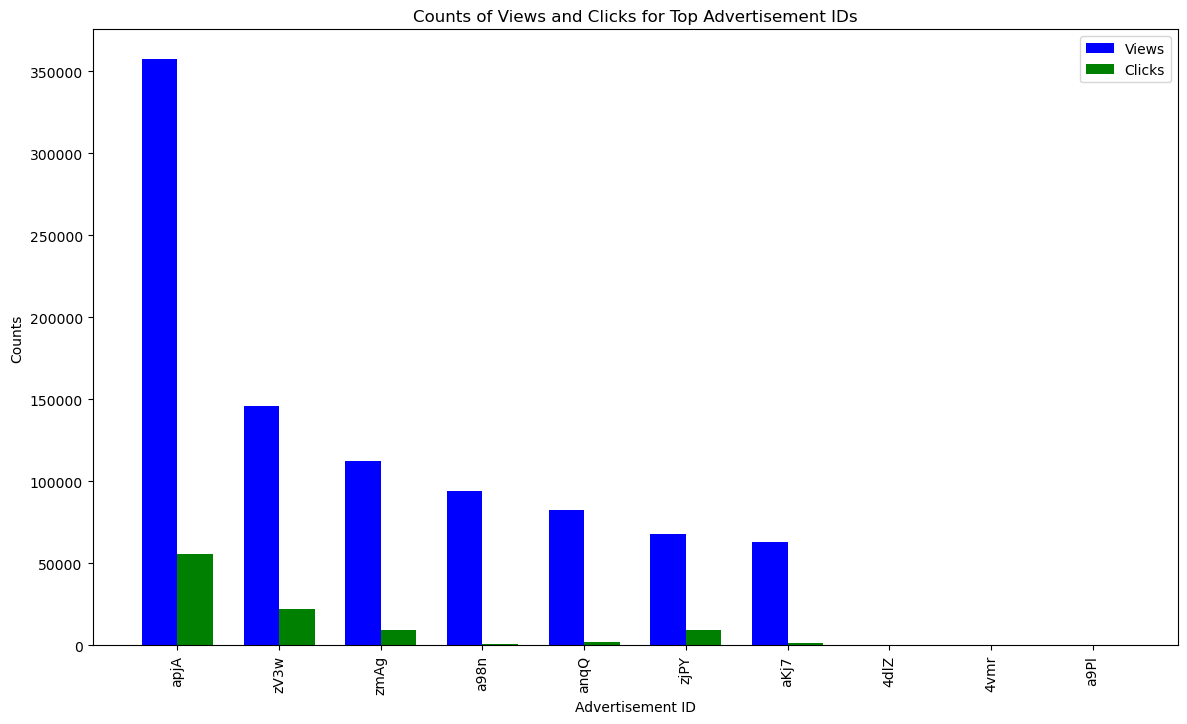

In [92]:
# First, we need to redefine view_counts and click_counts because they are not currently defined in this session
view_counts = data['adv_id'].value_counts()
click_counts = data.dropna(subset=['Click_tmestamp'])['adv_id'].value_counts()

# Define the number of top ads to display
top_n = 10

# Select the top N advertisement IDs for both views and clicks
top_ads_views = view_counts.head(top_n)
top_ads_clicks = click_counts.head(top_n).reindex(top_ads_views.index, fill_value=0)

# Set up the plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Get the x locations for the groups
ind = np.arange(len(top_ads_views))

# Plot both 'views' and 'clicks' in the same bar chart
bar_width = 0.35  # the width of the bars
rects1 = ax.bar(ind - bar_width/2, top_ads_views, bar_width, label='Views', color='b')
rects2 = ax.bar(ind + bar_width/2, top_ads_clicks, bar_width, label='Clicks', color='g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Advertisement ID')
ax.set_ylabel('Counts')
ax.set_title('Counts of Views and Clicks for Top Advertisement IDs')
ax.set_xticks(ind)
ax.set_xticklabels(top_ads_views.index, rotation=90)
ax.legend()

# Show the plot
plt.show()


Now we have a combined bar chart for both views (in blue) and clicks (in green) for the top advertisement IDs. This visual representation allows us to directly compare the number of views against the number of clicks for each ad, providing insight into how engaging each ad is relative to how often it's seen.

For instance, the ad with ID 'apiA' dominates in terms of views, and it also shows a significant number of clicks, indicating a strong performance both in attracting attention and in prompting action. The other ads have fewer views and clicks, but this kind of chart helps in quickly spotting which ads are over or underperforming in both categories.

## money column

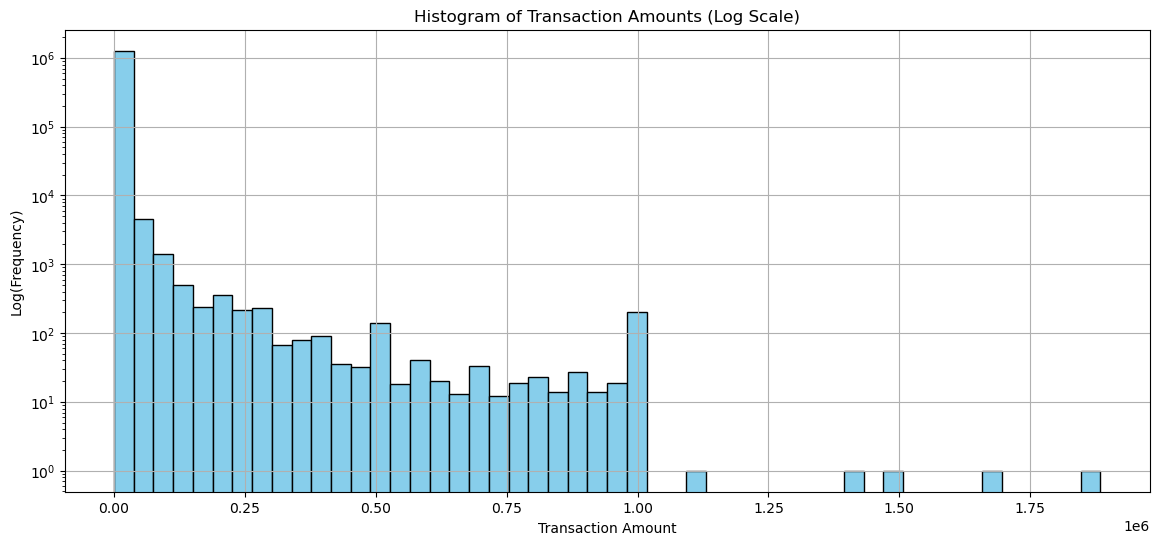

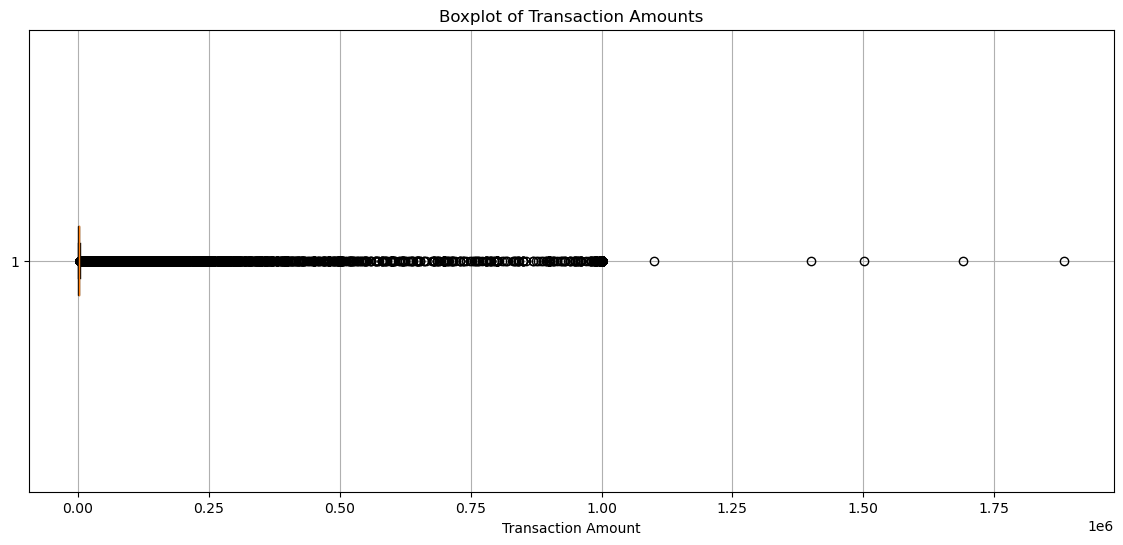

In [93]:
# For a more detailed view of the distribution, especially to handle skewness and outliers, we can use a log scale.
# Let's plot the histogram with a log scale for the transaction amounts to better visualize the distribution.

plt.figure(figsize=(14, 6))
# We'll add a small value to avoid log(0) which is undefined
plt.hist(data['money'] + 1, bins=50, color='skyblue', edgecolor='black', log=True)
plt.title('Histogram of Transaction Amounts (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()

# We will also recreate the boxplot for comparison and consistency in the analysis.
plt.figure(figsize=(14, 6))
plt.boxplot(data['money'], vert=False, patch_artist=True)  # vert=False for horizontal boxplot
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.grid(True)
plt.show()


**In the revised analysis, we have:**

#### Histogram (Log Scale):

- The histogram now uses a logarithmic scale for the frequency, which makes it easier to see the distribution of transaction amounts, especially when there are extreme values or outliers. This adjustment helps in visualizing both the common range of transaction values and the rare, higher-value transactions that are less frequent.
- The log scale highlights the fact that while a vast majority of transactions are of lower value, the distribution extends across a wide range of amounts, with fewer transactions at the higher end.

#### Boxplot:

- The boxplot remains the same, providing a summary view of the transaction amounts. It succinctly shows the median, interquartile range, and outliers, confirming the presence of high-value transactions as seen in the histogram.

Using a log scale for the histogram allows for a clearer understanding of the entire range of transaction amounts, including the less frequent, higher-value transactions that might be of interest for further investigation or analysis.

## network column

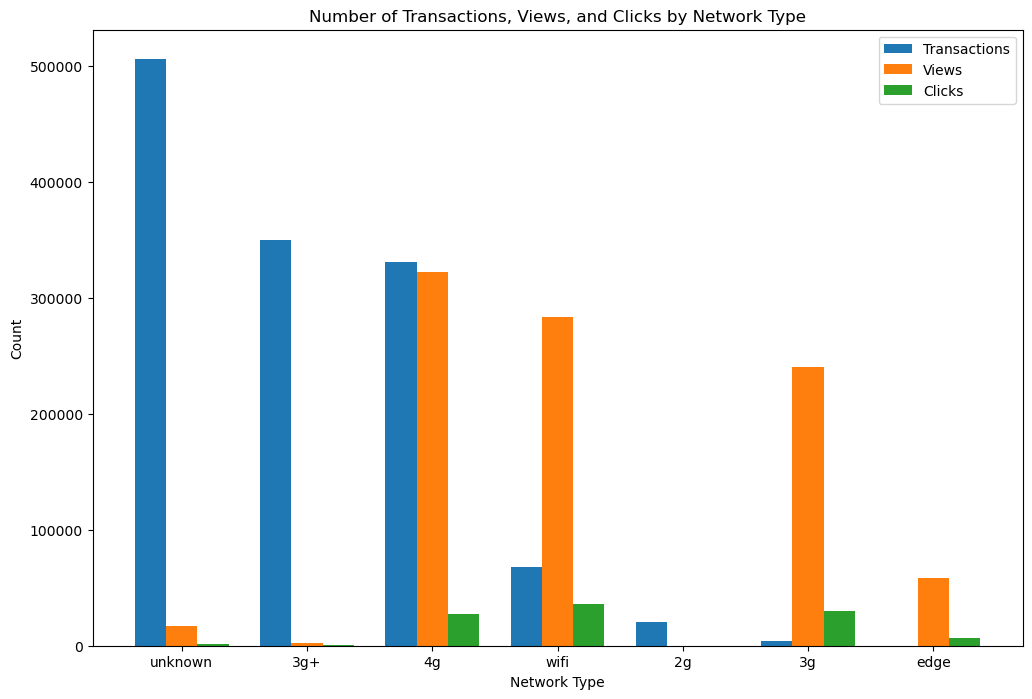

In [94]:
# We will create a bar chart to compare the number of transactions, views, and clicks by network type.

# Count the number of transactions, views, and clicks for each network type
transactions_by_network = data['network'].value_counts()
views_by_network = data.groupby('network')['View_timestamp'].count()
clicks_by_network = data.groupby('network')['Click_tmestamp'].count()

# Set up the plotting area
fig, ax = plt.subplots(figsize=(12, 8))

# Index for the network types to align the bars
index = np.arange(len(transactions_by_network))
bar_width = 0.25

# Plotting each metric in a bar chart
ax.bar(index, transactions_by_network, bar_width, label='Transactions')
ax.bar(index + bar_width, views_by_network, bar_width, label='Views')
ax.bar(index + 2*bar_width, clicks_by_network, bar_width, label='Clicks')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Network Type')
ax.set_ylabel('Count')
ax.set_title('Number of Transactions, Views, and Clicks by Network Type')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(transactions_by_network.index)
ax.legend()

plt.show()


The bar chart displays the number of transactions, views, and clicks for each network type. Here's how to interpret it:

- Each group of bars represents a different network type (e.g., WiFi, 4G, 3G).
- Within each group, there are three bars showing the count of transactions, views, and clicks associated with that network type.

This visualization allows us to compare how different network types correlate with user interactions. For instance, if one network type has significantly more transactions or views, it could indicate a preference or higher engagement level from users on that network. Understanding these patterns can be crucial for optimizing ad performance and targeting strategies based on network connectivity.

### kind_pay column

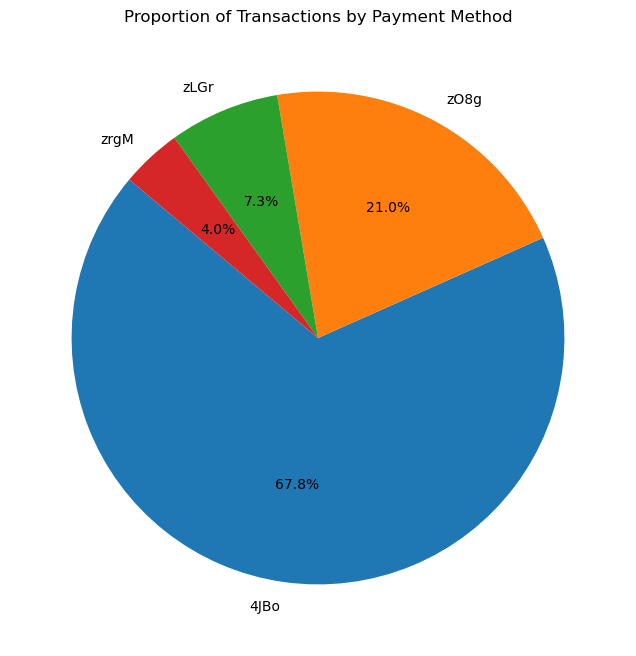

In [95]:
# Calculate the proportion of transactions for each payment method
payment_method_counts = data['kind_pay'].value_counts()

# Set up the plotting area for the pie chart
plt.figure(figsize=(10, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transactions by Payment Method')

plt.show()


- The pie chart illustrates the proportion of transactions by each payment method, represented by the kind_pay column. Each slice of the pie chart corresponds to a different payment method, with the size of each slice indicating the percentage of transactions conducted using that method.

- From this chart, you can discern which payment methods are most preferred or commonly used among users. A larger slice represents a higher proportion of transactions using that payment method, revealing user preferences or the accessibility and trustworthiness of different payment options in the transaction process. This information can be crucial for businesses looking to optimize payment options and enhance customer satisfaction and engagement

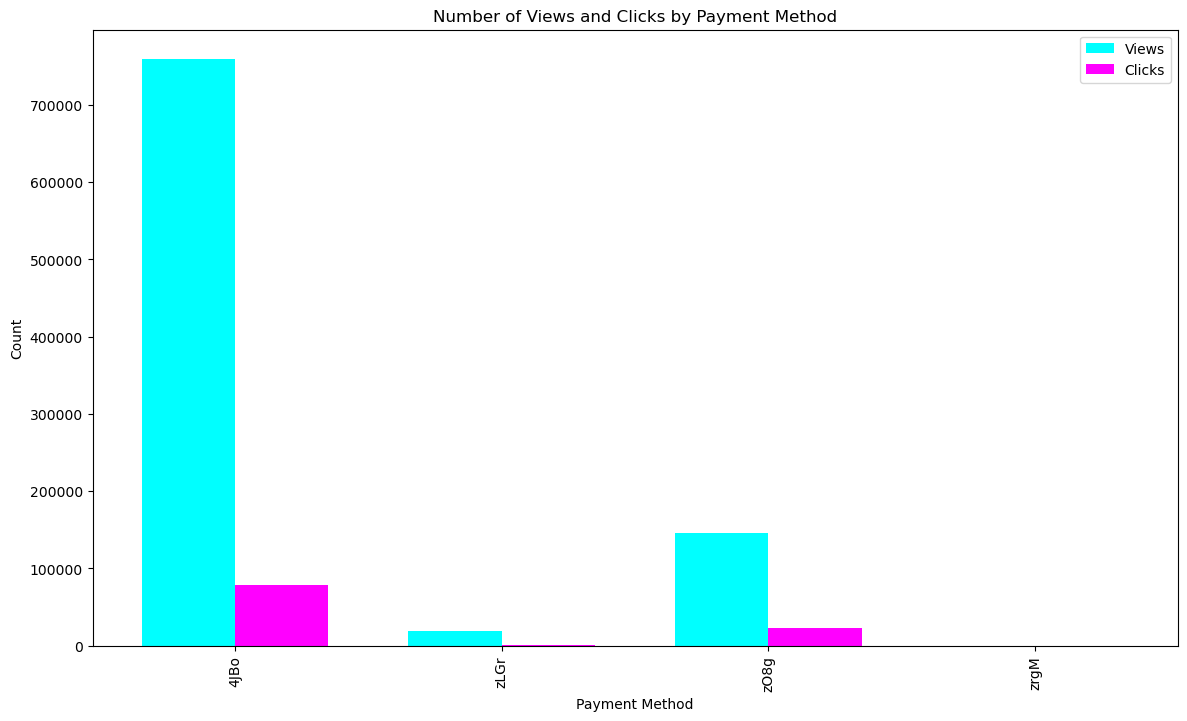

In [96]:
# To analyze views and clicks by payment method, we need to aggregate these metrics for each payment method identifier.
# We'll create a bar chart showing the number of views and clicks associated with each payment method.

# Aggregating views and clicks by payment method
views_by_payment = data.groupby('kind_pay')['View_timestamp'].count()
clicks_by_payment = data.groupby('kind_pay')['Click_tmestamp'].count()

# Set up the plotting area
fig, ax = plt.subplots(figsize=(14, 8))

# Index for the payment methods to align the bars
index = np.arange(len(views_by_payment))
bar_width = 0.35

# Plotting each metric in a bar chart
ax.bar(index - bar_width/2, views_by_payment, bar_width, label='Views', color='cyan')
ax.bar(index + bar_width/2, clicks_by_payment, bar_width, label='Clicks', color='magenta')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')
ax.set_title('Number of Views and Clicks by Payment Method')
ax.set_xticks(index)
ax.set_xticklabels(views_by_payment.index, rotation=90)
ax.legend()

plt.show()


The bar chart displays the number of views and clicks associated with each payment method. Here's how to interpret the chart:

- Each pair of bars represents a different payment method, as identified in the kind_pay column.
- The cyan bars indicate the total number of views for each payment method, while the magenta bars show the total number of clicks.

This visualization helps to understand user engagement with different payment methods. For instance, a payment method with a high number of views but relatively fewer clicks might indicate that users are interested but hesitant to complete transactions. Conversely, payment methods with a high number of both views and clicks may suggest strong user trust and effective conversion.

Analyzing these patterns can provide insights into how the choice of payment method influences user interactions and can guide strategies to optimize the payment process and improve overall engagement. 

## store_id column

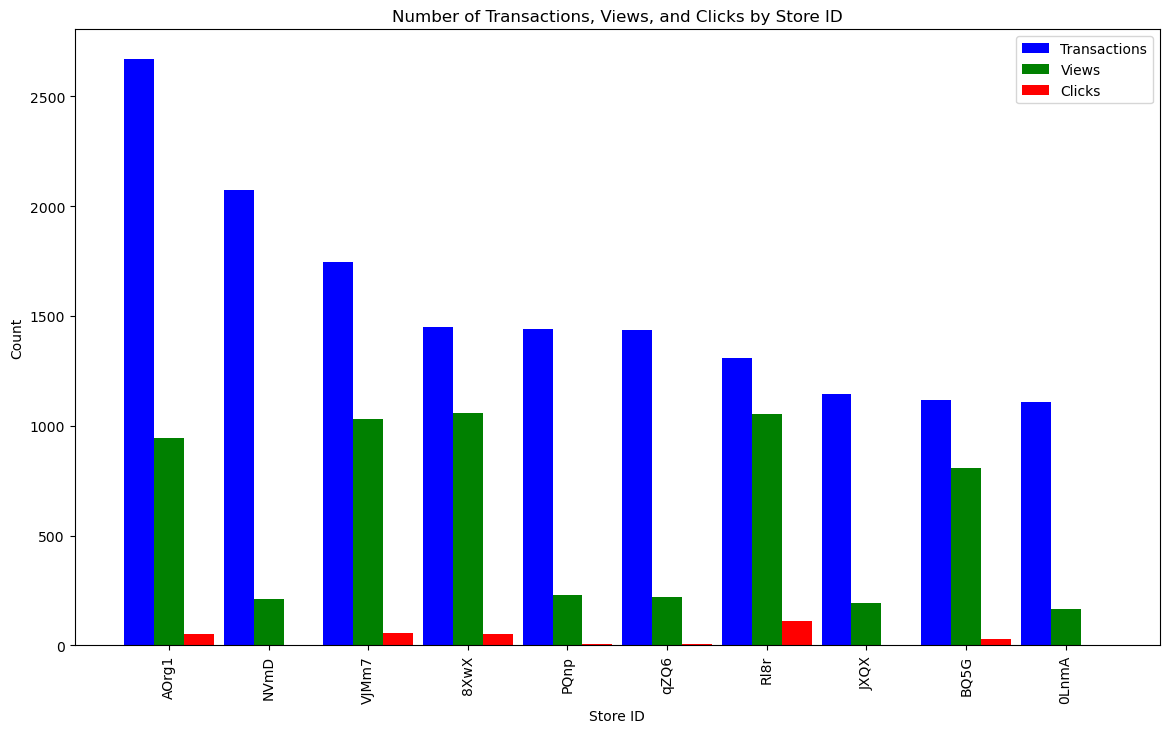

In [97]:
# To analyze the frequency of transactions, views, and clicks by store ID, we will aggregate these counts per store.

# Counting transactions, views, and clicks per store ID
transactions_by_store = data['store_id'].value_counts()
views_by_store = data.groupby('store_id')['View_timestamp'].count()
clicks_by_store = data.groupby('store_id')['Click_tmestamp'].count()

# Since there could be a large number of stores, for visualization purposes, we might want to limit to the top N stores
top_n = 10  # You can adjust this number based on the dataset and your needs
top_stores = transactions_by_store.head(top_n).index

# Filter the data to include only the top N stores
views_by_store = views_by_store.loc[top_stores]
clicks_by_store = clicks_by_store.loc[top_stores]

# Set up the plotting area
fig, ax = plt.subplots(figsize=(14, 8))

# Index for the stores to align the bars
index = np.arange(len(top_stores))
bar_width = 0.3

# Plotting each metric in a bar chart
ax.bar(index - bar_width, transactions_by_store[top_stores], bar_width, label='Transactions', color='blue')
ax.bar(index, views_by_store, bar_width, label='Views', color='green')
ax.bar(index + bar_width, clicks_by_store, bar_width, label='Clicks', color='red')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Store ID')
ax.set_ylabel('Count')
ax.set_title('Number of Transactions, Views, and Clicks by Store ID')
ax.set_xticks(index)
ax.set_xticklabels(top_stores, rotation=90)
ax.legend()

plt.show()


The bar chart shows the number of transactions, views, and clicks for the top stores as identified by store_id. In this visualization:

- Each group of bars represents a different store.
- The blue bars indicate the number of transactions at each store, the green bars show the number of views, and the red bars represent the number of clicks.

This chart allows us to compare directly the transaction frequency, view count, and click count across different stores, providing insights into which stores are more successful in attracting both views and actual transactions. Stores with high numbers of transactions and clicks might indicate higher popularity or more effective marketing and sales strategies. Conversely, stores with many views but fewer transactions may need to improve their conversion strategies.

Analyzing these patterns helps in understanding store performance in the context of online advertisements and user interactions, guiding potential strategies for improving engagement and sales

## industry column

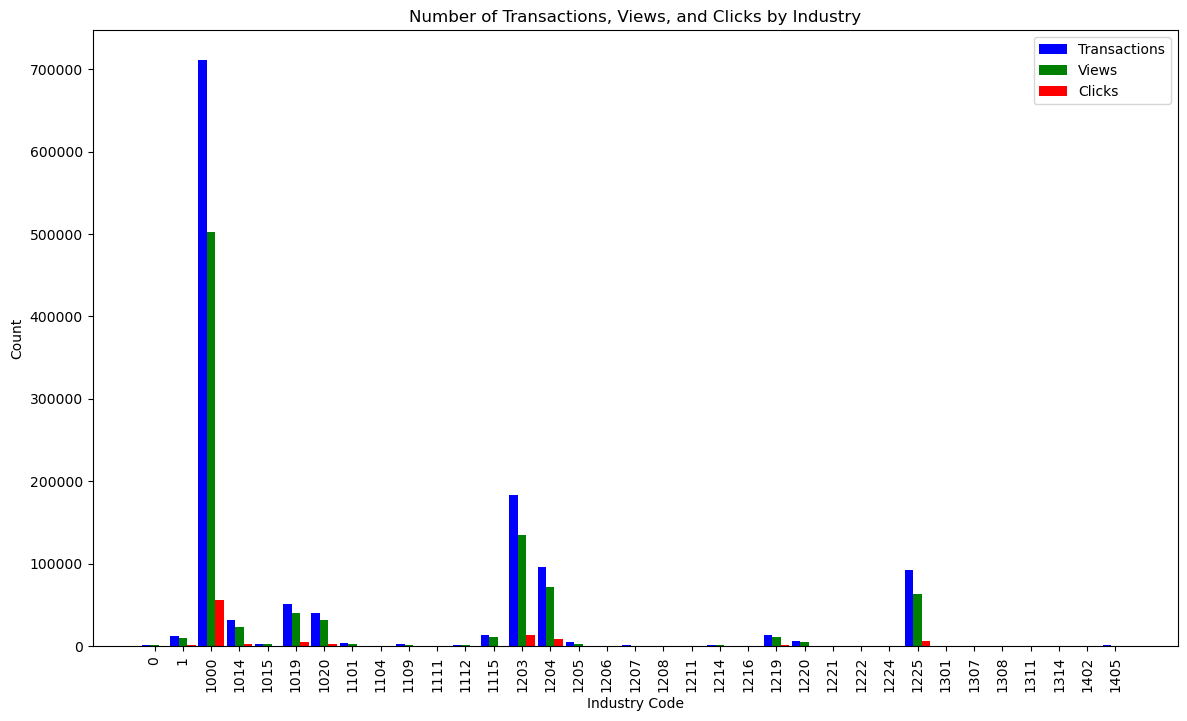

In [98]:
# To analyze the count of transactions, views, and clicks by industry code, we need to aggregate these counts per industry.

# Counting transactions, views, and clicks per industry code
transactions_by_industry = data.groupby('industry')['store_id'].count()  # Assuming each row represents a transaction
views_by_industry = data.groupby('industry')['View_timestamp'].count()
clicks_by_industry = data.groupby('industry')['Click_tmestamp'].count()

# Set up the plotting area
fig, ax = plt.subplots(figsize=(14, 8))

# Index for the industries to align the bars
index = np.arange(len(transactions_by_industry))
bar_width = 0.3

# Plotting each metric in a bar chart
ax.bar(index - bar_width, transactions_by_industry, bar_width, label='Transactions', color='blue')
ax.bar(index, views_by_industry, bar_width, label='Views', color='green')
ax.bar(index + bar_width, clicks_by_industry, bar_width, label='Clicks', color='red')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Industry Code')
ax.set_ylabel('Count')
ax.set_title('Number of Transactions, Views, and Clicks by Industry')
ax.set_xticks(index)
ax.set_xticklabels(transactions_by_industry.index, rotation=90)
ax.legend()

plt.show()


The bar chart displays the number of transactions, views, and clicks for each industry, categorized by their industry codes:

- Blue bars represent transactions, showing how many transactions occurred in each industry.
- Green bars indicate views, reflecting how often advertisements related to each industry were viewed.
- Red bars show clicks, which provide insight into the engagement level with the advertisements by users in each industry.

This visualization helps to understand which industries are more actively engaged with advertisements. Industries with higher transactions and clicks are likely more effective in converting advertisement views into actions. This information can be valuable for businesses and advertisers to identify which sectors are more responsive to online ads and where to focus their marketing efforts for better engagement and ROI.

## gender column

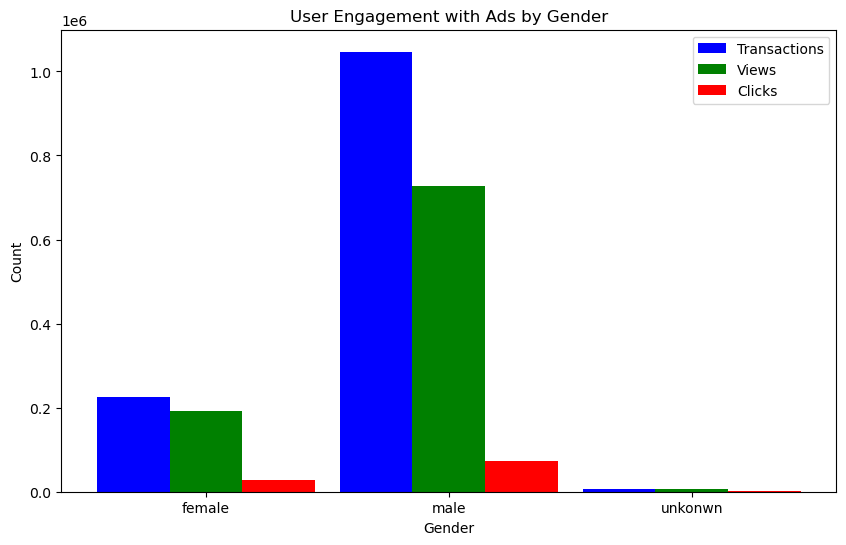

In [167]:
# To analyze user engagement with ads by gender, we'll count the number of views, clicks, and transactions for each gender.

# Counting transactions, views, and clicks per gender
transactions_by_gender = data.groupby('gender')['store_id'].count()  # Assuming each row represents a transaction
views_by_gender = data.groupby('gender')['View_timestamp'].count()
clicks_by_gender = data.groupby('gender')['Click_tmestamp'].count()

# Set up the plotting area
fig, ax = plt.subplots(figsize=(10, 6))

# Index for the genders to align the bars
index = np.arange(len(transactions_by_gender))
bar_width = 0.3

# Plotting each metric in a bar chart
ax.bar(index - bar_width, transactions_by_gender, bar_width, label='Transactions', color='blue')
ax.bar(index, views_by_gender, bar_width, label='Views', color='green')
ax.bar(index + bar_width, clicks_by_gender, bar_width, label='Clicks', color='red')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('User Engagement with Ads by Gender')
ax.set_xticks(index)
ax.set_xticklabels(transactions_by_gender.index, rotation=0)
ax.legend()

plt.show()


The bar chart illustrates user engagement with advertisements, segmented by gender:

- Blue bars represent transactions, indicating how many times users of each gender have completed a transaction after interacting with an ad.
- Green bars show views, reflecting the number of times users of each gender have viewed the ads.
- Red bars depict clicks, demonstrating the engagement level or interaction of users of each gender with the ads.

This visualization helps assess whether there is a gender-based preference in interaction with advertisements. For example, if one gender has significantly more views or clicks, it could indicate that the advertisements are more appealing to or more frequently encountered by that gender.

Analyzing such data enables advertisers to understand better and cater to the preferences of different demographic groups, potentially leading to more effective and targeted advertising strategies. 

## Label_Click column

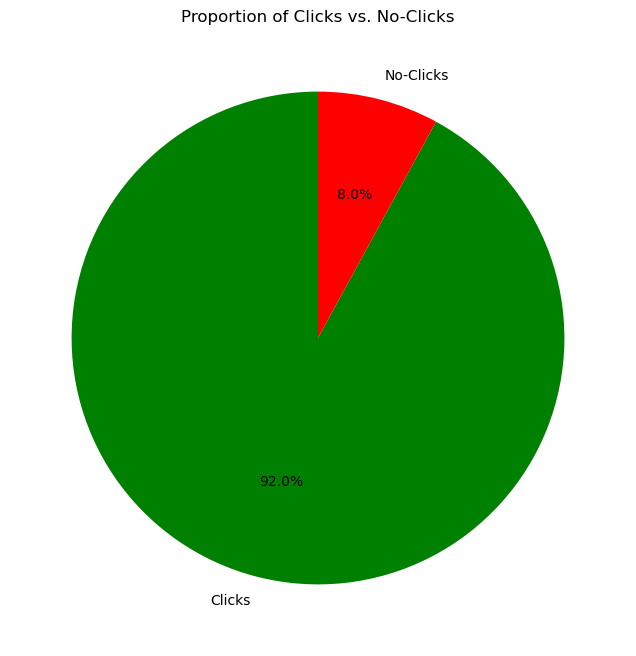

In [100]:
# To create a pie chart showing the proportion of clicks versus no-clicks, we need to count the occurrences of each.

# Count the number of clicks and no-clicks
click_counts = data['Label_Click'].value_counts()

# Set up the plotting area for the pie chart
plt.figure(figsize=(8, 8))
plt.pie(click_counts, labels=['Clicks', 'No-Clicks'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Proportion of Clicks vs. No-Clicks')

plt.show()


The pie chart shows the proportion of clicks (in green) versus no-clicks (in red) for the advertisements. This visual representation provides a straightforward view of the click-through rate (CTR):

- The green slice represents the percentage of interactions where users clicked on the advertisement.
- The red slice shows the percentage of interactions where users viewed the advertisement but did not click on it.

This chart is a direct indicator of the effectiveness of the advertisements in generating user engagement. A larger green slice would indicate a higher CTR, suggesting that the advertisements are compelling and successfully prompting users to take action. Conversely, a larger red slice highlights the potential need for improvement in ad content or targeting to convert views into clicks.

Understanding this ratio is crucial for advertisers aiming to optimize their campaigns and improve engagement with their target audience.

### Let's proceed with calculating the CTR for each advertisement in the provided dataset to get a practical understanding of the CTR.

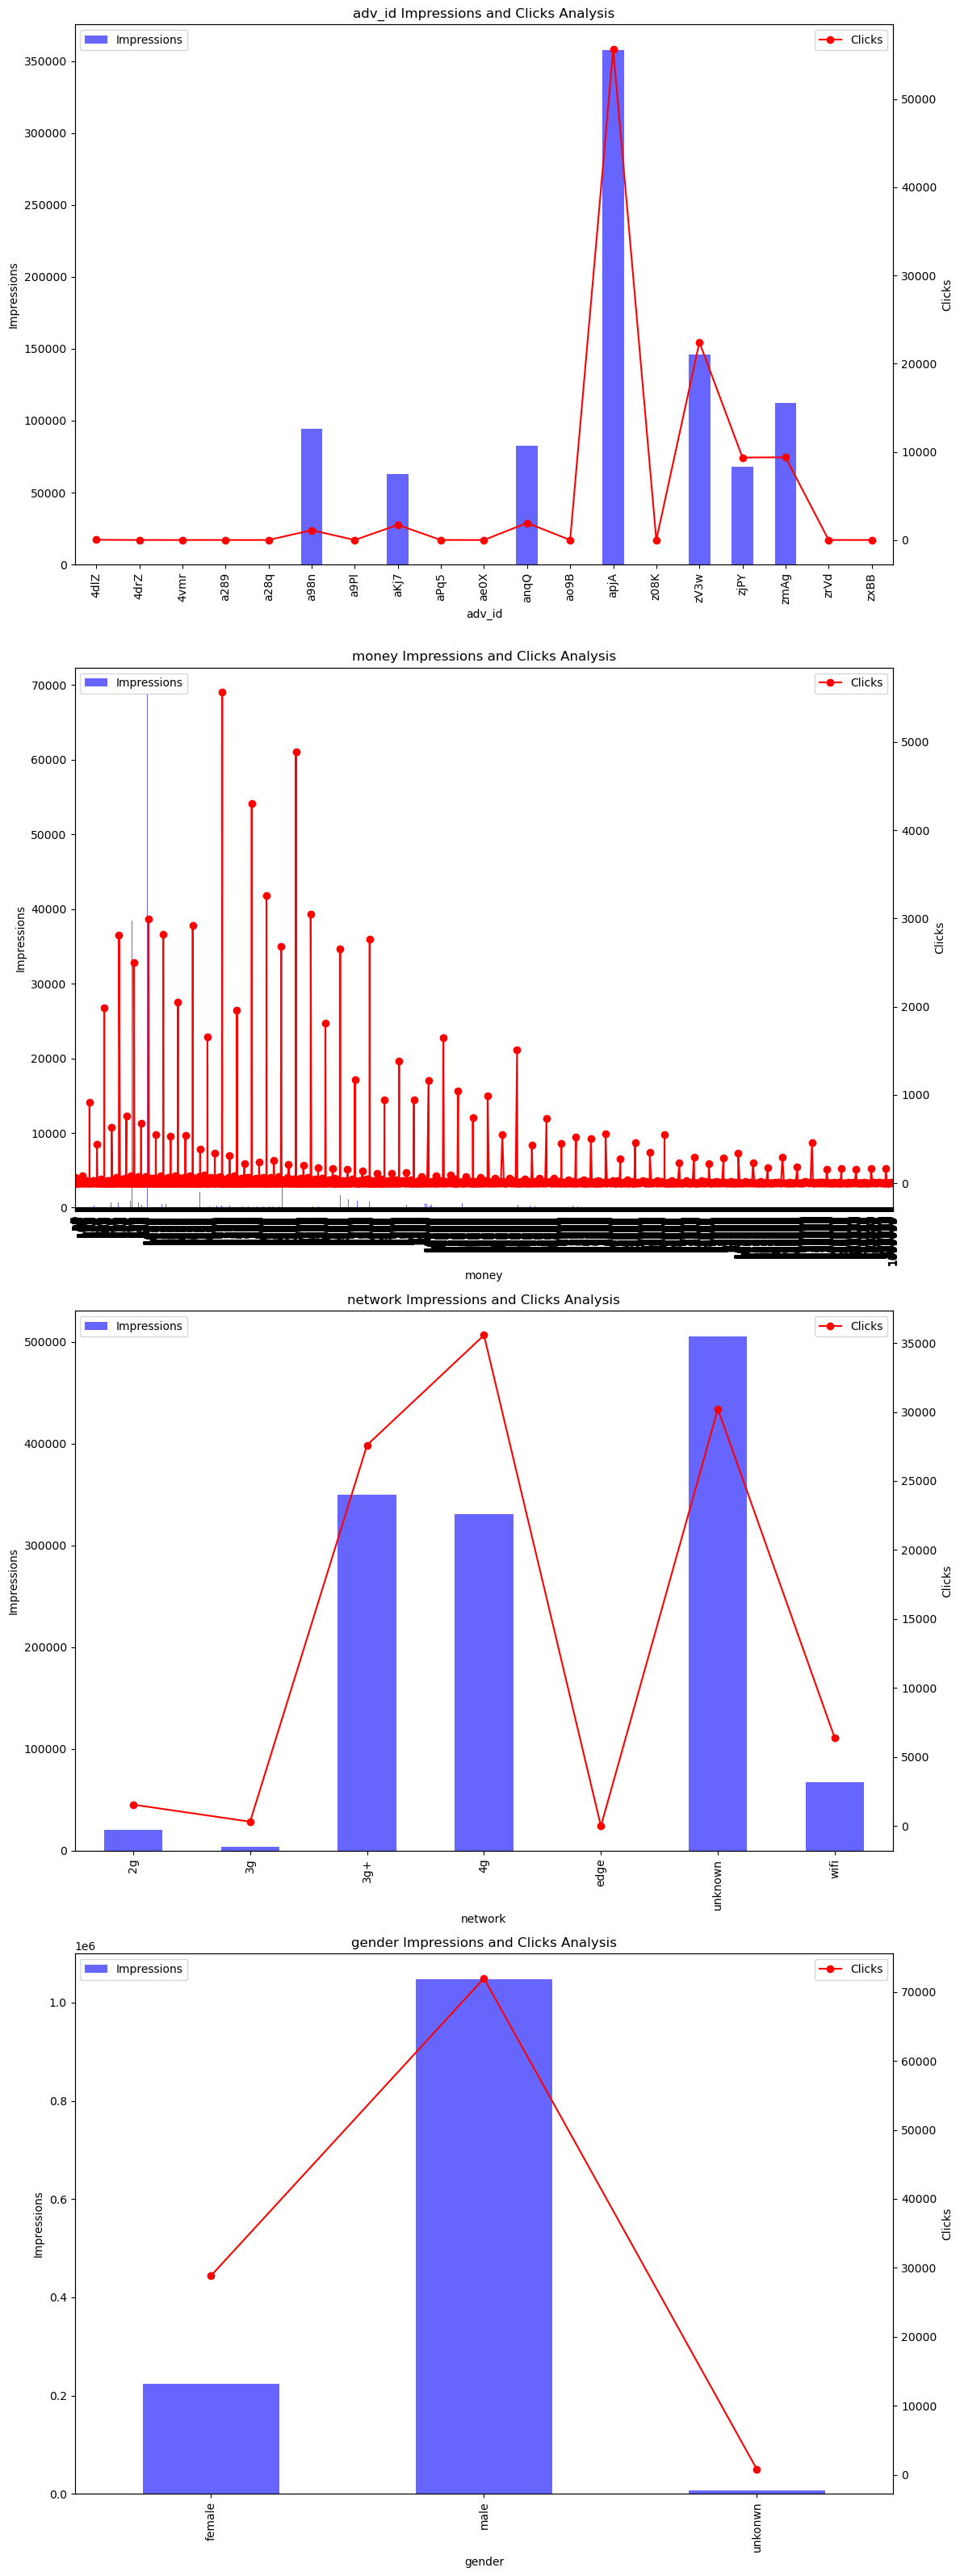

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the important columns for plotting
important_columns = ['adv_id', 'money', 'network', 'gender']

# Prepare the plots
fig, axes = plt.subplots(len(important_columns), figsize=(12, 8 * len(important_columns)))

for i, column in enumerate(important_columns):
    # Aggregate data by the column for impressions and clicks
    agg_data = data.groupby(column).agg(
        Impressions=pd.NamedAgg(column='Label_Click', aggfunc='size'),
        Clicks=pd.NamedAgg(column='Label_Click', aggfunc='sum')
    )

    ax = axes[i]

    # Plotting Impressions
    agg_data['Impressions'].plot(kind='bar', ax=ax, color='blue', label='Impressions', alpha=0.6)

    # Create twin axis for clicks
    ax2 = ax.twinx()
    agg_data['Clicks'].plot(kind='line', ax=ax2, color='red', label='Clicks', marker='o')

    ax.set_title(f'{column} Impressions and Clicks Analysis')
    ax.set_xlabel(column)
    ax.set_ylabel('Impressions')
    ax2.set_ylabel('Clicks')

    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [168]:
import pandas as pd

# List of columns to analyze
columns_to_analyze = ['adv_id', 'money', 'network', 'kind_pay', 'store_id', 'industry', 'gender']

# Initialize a dictionary to store the results
analysis_results = {}

# Analyze each column
for column in columns_to_analyze:
    # Aggregate the data by the current column
    agg_data = data.groupby(column).agg(
        Impressions=pd.NamedAgg(column='Label_Click', aggfunc='size'),
        Clicks=pd.NamedAgg(column='Label_Click', aggfunc='sum')
    )
    # Calculate the CTR
    agg_data['CTR'] = (agg_data['Clicks'] / agg_data['Impressions']) * 100

    # Store the results in the dictionary
    analysis_results[column] = agg_data

# Display the analysis results for each column
for column, result in analysis_results.items():
    print(f"\nAnalysis for {column}:")
    print(result)



Analysis for adv_id:
        Impressions  Clicks    CTR
adv_id                            
4dlZ            330      22   6.67
4drZ              1       0   0.00
4vmr            253       1   0.40
a289              1       0   0.00
a28q              1       1 100.00
a98n          94136    1116   1.19
a9Pl              4       0   0.00
aKj7          62908    1716   2.73
aPq5              1       0   0.00
ae0X              2       0   0.00
anqQ          82694    1934   2.34
ao9B              1       0   0.00
apjA         357574   55676  15.57
z08K              1       0   0.00
zV3w         145773   22433  15.39
zjPY          68171    9354  13.72
zmAg         112466    9374   8.33
zrVd              2       0   0.00
zxBB              1       0   0.00

Analysis for money:
         Impressions  Clicks  CTR
money                            
1                712      63 8.85
2                 44       2 4.55
3                  9       0 0.00
4                  4       0 0.00
5                 

#### CTR for adv_id 

In [169]:
# Data preparation and calculation of CTR (Click Through Rate)

# Count the number of impressions and clicks for each advertisement
impressions = data.groupby('adv_id').size()
clicks = data.dropna(subset=['Click_tmestamp']).groupby('adv_id').size()

# Calculate CTR for each advertisement
ctr = (clicks / impressions) * 100

# Create a DataFrame to show the result
ctr_df = pd.DataFrame({
    'Impressions': impressions,
    'Clicks': clicks,
    'CTR (%)': ctr
}).reset_index()

ctr_df


,adv_id,Impressions,Clicks,CTR (%)
0,4dlZ,330,22.00,6.67
1,4drZ,1,NaN,NaN
2,4vmr,253,1.00,0.40
3,a289,1,NaN,NaN
4,a28q,1,1.00,100.00
5,a98n,94136,1116.00,1.19
6,a9Pl,4,NaN,NaN
7,aKj7,62908,1716.00,2.73
8,aPq5,1,NaN,NaN
9,ae0X,2,NaN,NaN


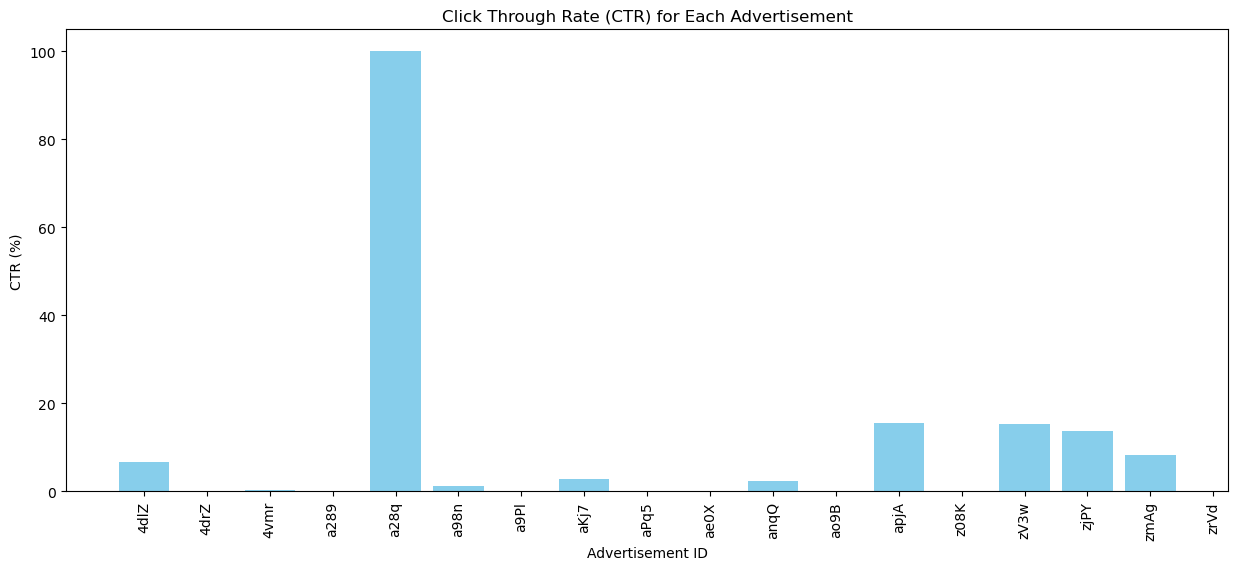

In [170]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation and calculation of CTR (Click Through Rate)

# Assuming 'data' is a DataFrame that has been previously defined and loaded with advertisement data

# Count the number of impressions and clicks for each advertisement
impressions = data.groupby('adv_id').size()
clicks = data.dropna(subset=['Click_tmestamp']).groupby('adv_id').size()

# Calculate CTR for each advertisement
ctr = (clicks / impressions) * 100

# Create a DataFrame to show the result
ctr_df = pd.DataFrame({
    'Impressions': impressions,
    'Clicks': clicks,
    'CTR (%)': ctr
}).reset_index()

# Plotting the CTR for each advertisement
plt.figure(figsize=(15, 6))
plt.bar(ctr_df['adv_id'], ctr_df['CTR (%)'], color='skyblue')
plt.title('Click Through Rate (CTR) for Each Advertisement')
plt.xlabel('Advertisement ID')
plt.ylabel('CTR (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


#### CTR for network

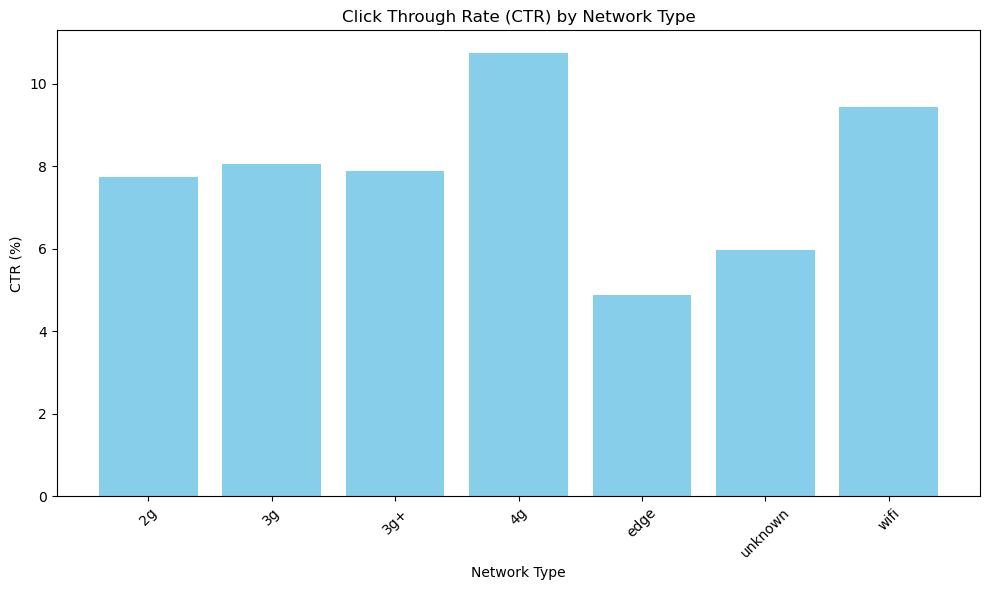

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a DataFrame that has been previously defined and loaded with network data

# Count the number of impressions and clicks for each network type
network_impressions = data.groupby('network').size()
network_clicks = data.dropna(subset=['Click_tmestamp']).groupby('network').size()

# Calculate CTR for each network type
network_ctr = (network_clicks / network_impressions) * 100

# Create a DataFrame to show the result
network_ctr_df = pd.DataFrame({
    'Impressions': network_impressions,
    'Clicks': network_clicks,
    'CTR (%)': network_ctr
}).reset_index()

# Plotting the CTR for each network type
plt.figure(figsize=(10, 6))
plt.bar(network_ctr_df['network'], network_ctr_df['CTR (%)'], color='skyblue')
plt.title('Click Through Rate (CTR) by Network Type')
plt.xlabel('Network Type')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()


### CTR for gender

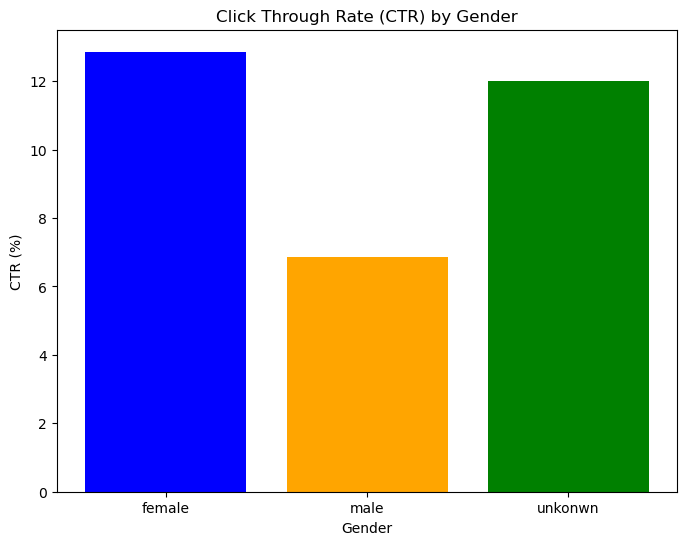

In [172]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame

# Count the number of impressions and clicks for each gender
gender_impressions = data.groupby('gender').size()
gender_clicks = data.dropna(subset=['Click_tmestamp']).groupby('gender').size()

# Calculate CTR for each gender
gender_ctr = (gender_clicks / gender_impressions) * 100

# Create a DataFrame to show the result
gender_ctr_df = pd.DataFrame({
    'Impressions': gender_impressions,
    'Clicks': gender_clicks,
    'CTR (%)': gender_ctr
}).reset_index()

# Plotting the CTR for each gender
plt.figure(figsize=(8, 6))
plt.bar(gender_ctr_df['gender'], gender_ctr_df['CTR (%)'], color=['blue', 'orange', 'green']) # Colors for each gender
plt.title('Click Through Rate (CTR) by Gender')
plt.xlabel('Gender')
plt.ylabel('CTR (%)')
plt.show()


In [186]:
# Calculate impressions (views) for each gender
male_impressions = data[data['gender'] == 'male']['View_timestamp'].count()
female_impressions = data[data['gender'] == 'female']['View_timestamp'].count()

# Calculate clicks for each gender
male_clicks = data[data['gender'] == 'male']['Click_tmestamp'].count()
female_clicks = data[data['gender'] == 'female']['Click_tmestamp'].count()

# Calculate CTR for each gender
male_ctr = (male_clicks / male_impressions) if male_impressions > 0 else 0
female_ctr = (female_clicks / female_impressions) if female_impressions > 0 else 0

# Print results
print(f"Male Impressions: {male_impressions}, Male CTR: {male_ctr}")
print(f"Female Impressions: {female_impressions}, Female CTR: {female_ctr}")


Male Impressions: 726787, Male CTR: 0.09902075848907589
Female Impressions: 191961, Female CTR: 0.15043680747651866


#### Male

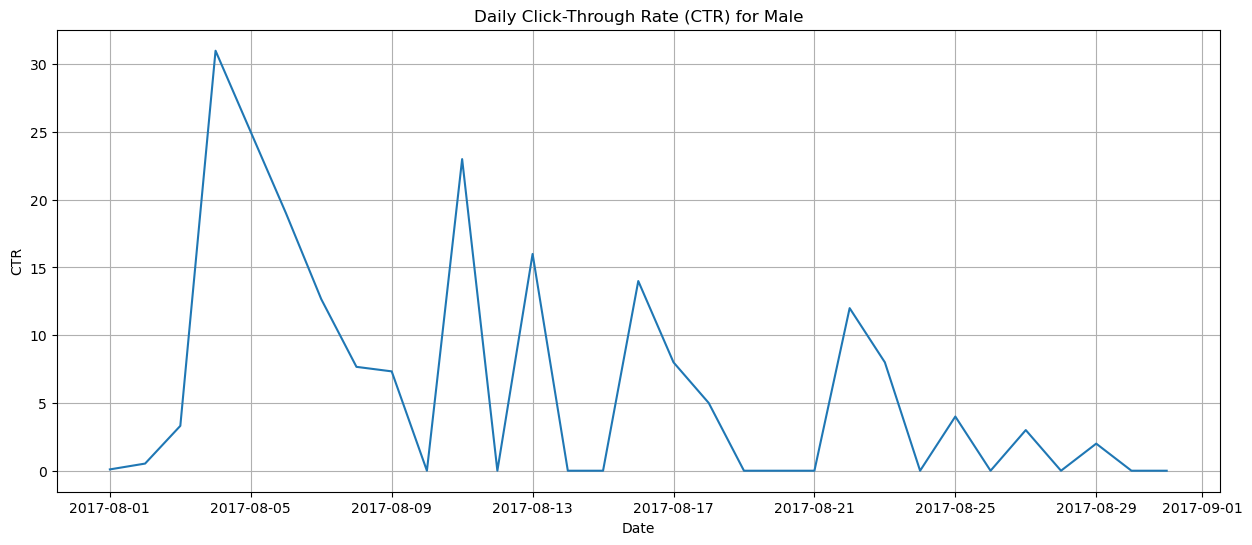

In [187]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a DataFrame with your original dataset
# First, ensure that 'View_timestamp' and 'Click_tmestamp' are in datetime format
data['View_timestamp'] = pd.to_datetime(data['View_timestamp'], errors='coerce')
data['Click_tmestamp'] = pd.to_datetime(data['Click_tmestamp'], errors='coerce')

# Filter out data for the male gender
male_data = data[data['gender'] == 'male']

# Group by date for views and clicks
views_per_day_male = male_data.groupby(male_data['View_timestamp'].dt.date).size()
clicks_per_day_male = male_data.groupby(male_data['Click_tmestamp'].dt.date).size()

# Calculate CTR per day
ctr_per_day_male = (clicks_per_day_male / views_per_day_male).fillna(0)

# Plot CTR for male over time
plt.figure(figsize=(15, 6))
ctr_per_day_male.plot()
plt.title('Daily Click-Through Rate (CTR) for Male')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.grid(True)
plt.show()


#### Female

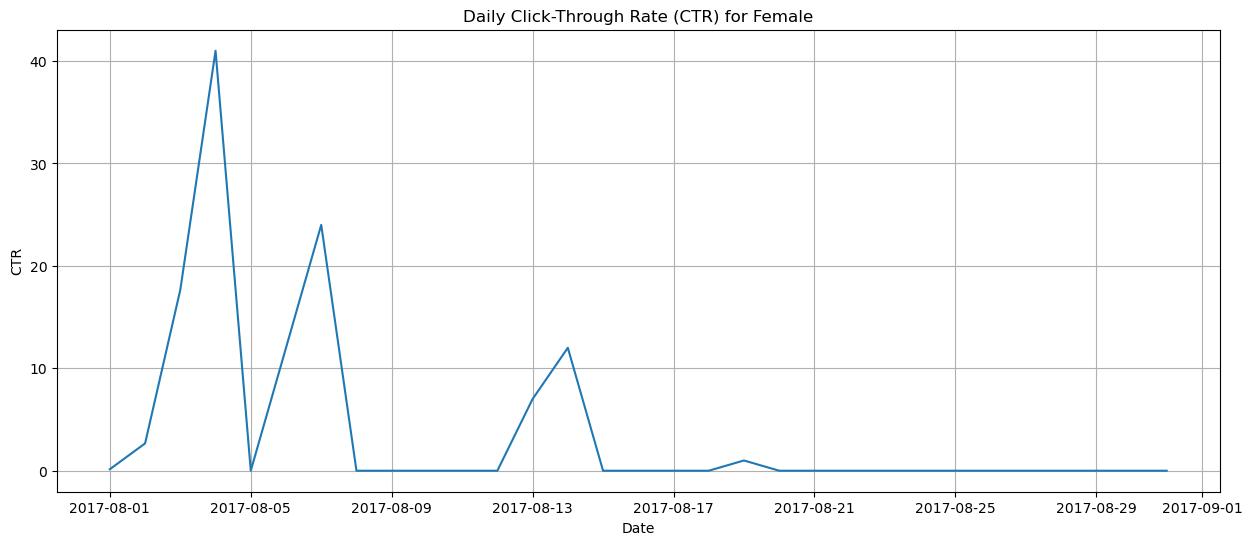

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is a DataFrame with your original dataset

# Filter out data for the male gender
female_data = data[data['gender'] == 'female']

# Group by date for views and clicks
views_per_day_female = female_data.groupby(female_data['View_timestamp'].dt.date).size()
clicks_per_day_female = female_data.groupby(female_data['Click_tmestamp'].dt.date).size()

# Calculate CTR per day
ctr_per_day_female = (clicks_per_day_female / views_per_day_female).fillna(0)

# Plot CTR for male over time
plt.figure(figsize=(15, 6))
ctr_per_day_female.plot()
plt.title('Daily Click-Through Rate (CTR) for Female')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.grid(True)
plt.show()


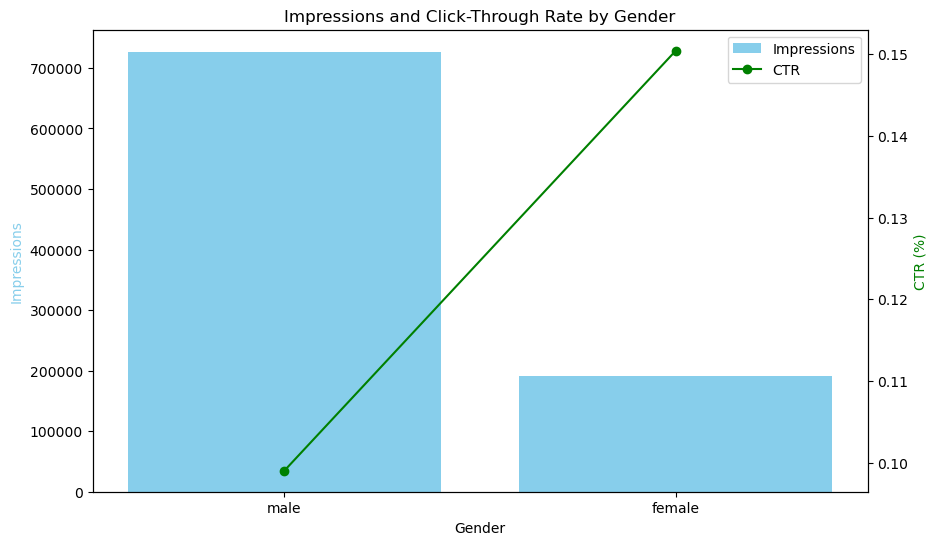

In [189]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming plot_data is a DataFrame with 'gender', 'Impressions', and 'CTR' columns
plot_data = pd.DataFrame({
    'Gender': ['male', 'female'],
    'Impressions': [male_impressions, female_impressions],
    'CTR': [male_ctr, female_ctr]
})

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Impressions
impressions_bars = ax1.bar(plot_data['Gender'], plot_data['Impressions'], color='skyblue', label='Impressions')

# Twin object for two different y-axes on the same plot
ax2 = ax1.twinx()

# Line plot for CTR
ctr_line, = ax2.plot(plot_data['Gender'], plot_data['CTR'], color='green', label='CTR', marker='o')

# Setting labels and titles
ax1.set_xlabel('Gender')
ax1.set_ylabel('Impressions', color='skyblue')
ax2.set_ylabel('CTR (%)', color='green')
ax1.set_title('Impressions and Click-Through Rate by Gender')

# Adding a legend
handles, labels = ax1.get_legend_handles_labels()
handles.append(ctr_line)
labels.append(ctr_line.get_label())
ax1.legend(handles, labels)

plt.show()


# Gender

## Descriptive Analysis:

In [173]:
import pandas as pd

# Assuming 'data' is your DataFrame and it contains a 'gender' column
gender_counts = data['gender'].value_counts()
gender_percentages = data['gender'].value_counts(normalize=True) * 100


# For numerical columns in your data, calculate descriptive statistics grouped by gender
gender_stats = data.groupby('gender').describe()


# Combine the counts and percentages for a summary DataFrame
gender_demographics = pd.DataFrame({
    'Counts': gender_counts,
    'Percentages': gender_percentages
})
# Output the results to the console or a file
print(gender_demographics)
print(gender_stats)


          Counts  Percentages
gender                       
male     1046892        81.91
female    224521        17.57
unkonwn     6655         0.52
        txn_timestamp                                                      \
                count                           mean                  min   
gender                                                                      
female         224521  2017-08-01 15:09:05.600322560  2017-08-01 00:00:01   
male          1046892  2017-08-01 15:07:02.654843904  2017-08-01 00:00:01   
unkonwn          6655  2017-08-01 15:02:30.306386176  2017-08-01 00:02:05   

                                                                               \
                                25%                  50%                  75%   
gender                                                                          
female          2017-08-01 11:57:21  2017-08-01 15:14:07  2017-08-01 19:04:40   
male            2017-08-01 11:55:52  2017-08-01 14:59:36  2017-

## Segmentation

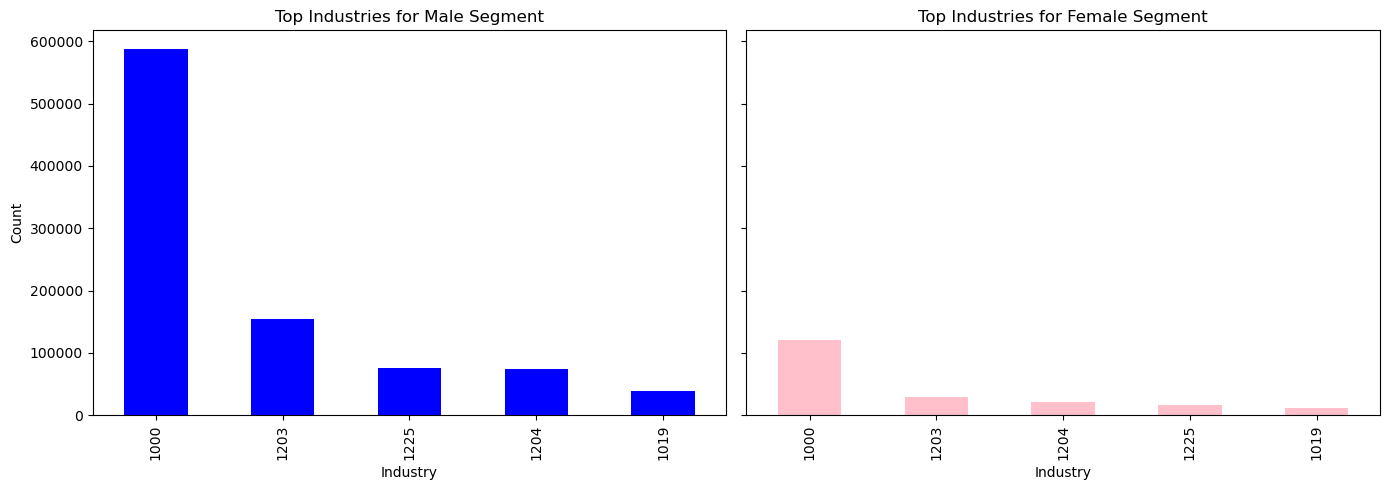

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame that contains your dataset
# Segment the data by gender
male_segment = data[data['gender'] == 'male']
female_segment = data[data['gender'] == 'female']

# Average transaction value by gender
average_transaction_value_male = male_segment['money'].mean()
average_transaction_value_female = female_segment['money'].mean()

# Frequency of purchase (approximated by unique user transactions)
frequency_of_purchase_male = male_segment['txn_user_id'].nunique()
frequency_of_purchase_female = female_segment['txn_user_id'].nunique()

# Responsiveness to advertisements by gender (using 'adv_id' to count distinct ads interacted with)
ads_interacted_male = male_segment['adv_id'].nunique()
ads_interacted_female = female_segment['adv_id'].nunique()

# Preferences for industries (using 'industry' to see top industries)
top_industries_male = male_segment['industry'].value_counts().head()
top_industries_female = female_segment['industry'].value_counts().head()

# Create a summary DataFrame for comparison
summary_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Average Transaction Value': [average_transaction_value_male, average_transaction_value_female],
    'Frequency of Purchase': [frequency_of_purchase_male, frequency_of_purchase_female],
    'Ads Interacted With': [ads_interacted_male, ads_interacted_female]
})

# Visualization of top industries for each gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

top_industries_male.plot(kind='bar', ax=axes[0], title='Top Industries for Male Segment', color='blue')
top_industries_female.plot(kind='bar', ax=axes[1], title='Top Industries for Female Segment', color='pink')

axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Count')
axes[1].set_xlabel('Industry')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Trend Analysis

C:\Users\alhai\AppData\Local\Temp\ipykernel_8040\2233900606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['txn_timestamp'] = pd.to_datetime(male_data['txn_timestamp'])
C:\Users\alhai\AppData\Local\Temp\ipykernel_8040\2233900606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['txn_timestamp'] = pd.to_datetime(female_data['txn_timestamp'])


txn_timestamp
2017-08-01    3296738301
2017-08-02          5050
Name: money, dtype: int64
txn_timestamp
2017-08-01    705752721
Name: money, dtype: int64


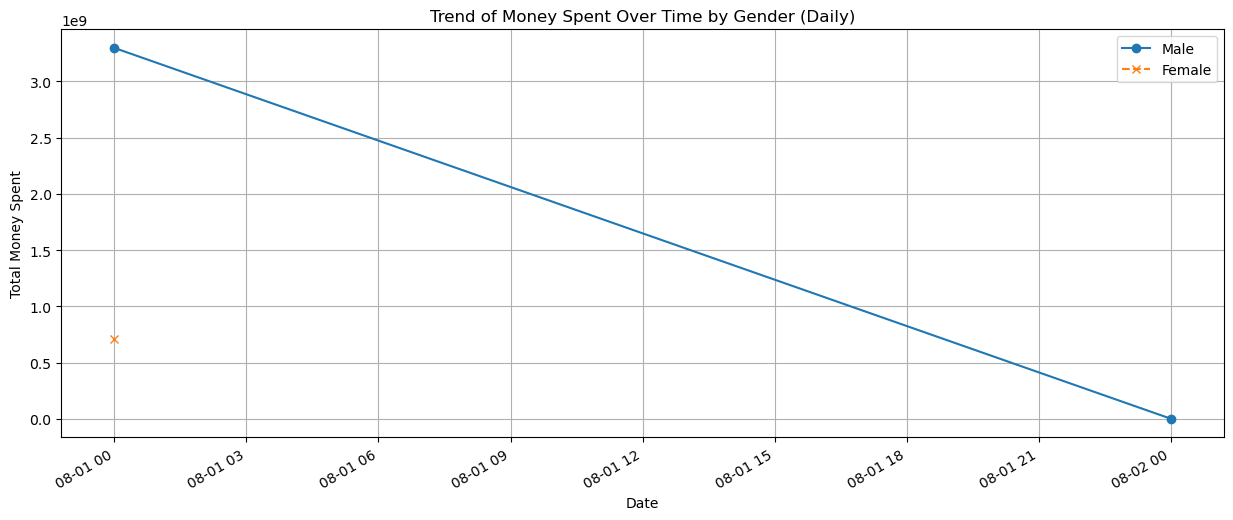

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming male_data and female_data are already loaded DataFrames

# Convert 'txn_timestamp' to datetime type
male_data['txn_timestamp'] = pd.to_datetime(male_data['txn_timestamp'])
female_data['txn_timestamp'] = pd.to_datetime(female_data['txn_timestamp'])

# Ensure the data is properly grouped by day for both segments
male_daily_sums = male_data.groupby(male_data['txn_timestamp'].dt.normalize())['money'].sum()
female_daily_sums = female_data.groupby(female_data['txn_timestamp'].dt.normalize())['money'].sum()

# Now let's check the entire range of dates for the female segment
print(male_daily_sums)
print(female_daily_sums)

# Plot the results making sure to include the female segment
plt.figure(figsize=(15, 6))
male_daily_sums.plot(label='Male', style='-o')  # Style with circle markers
female_daily_sums.plot(label='Female', style='--x')  # Dashed line with x markers
plt.title('Trend of Money Spent Over Time by Gender (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Money Spent')
plt.legend()
plt.grid(True)
plt.show()


The output indicates that there are only transactions for females on a single day, which is why not seeing a plot line for females—there's simply not enough data to create a line. The male data seems to have a significant sum on the first day and a very small sum on the second day, indicating that most of the activity happened on the first day.

## CTR and Conversion Rates:

In [178]:
# Assuming `data` is your DataFrame and it has been preprocessed accordingly
import pandas as pd

# Calculate conversion rate using 'Label_Click'
conversion_rate = data.groupby('gender')['Label_Click'].mean() * 100

# Estimate session engagement (e.g., time spent) by the time difference between view and click timestamps
# Here's a rough estimate assuming the time from view to click is session engagement
data['session_engagement'] = (data['Click_tmestamp'] - data['View_timestamp']).dt.total_seconds()
average_engagement = data.groupby('gender')['session_engagement'].mean()

# Since we don't have direct measures for page visits or cart abandonment, we'll skip these metrics.

# Creating a summary DataFrame with the calculated metrics
gender_behavior_metrics = pd.DataFrame({
    'Conversion Rate (%)': conversion_rate,
    'Average Engagement (seconds)': average_engagement
})

gender_behavior_metrics


,Conversion Rate (%),Average Engagement (seconds)
gender,,
female,12.86,8276.83
male,6.87,6494.40
unkonwn,12.01,5193.24


**The results from the analysis provide an interesting insight into the behavior of different gender segments on your platform:**

#### 1. Conversion Rate (%):

- Female: The conversion rate for females is 12.86%, meaning that out of all the interactions (clicks, views) females had with your content or ads, 12.86% resulted in a conversion (e.g., making a purchase, signing up for a service).
- Male: The conversion rate for males is 6.87%, which is almost half of the female conversion rate. This suggests that males were less likely to take the intended action after interaction.
- Unknown: The conversion rate for users whose gender is unknown is 12.01%, which is close to that of females and significantly higher than that of males.

#### 2. Average Engagement (seconds):

- Female: On average, females spent approximately 8276.83 seconds (about 2 hours and 18 minutes) engaged per session. This indicates that female users were more engaged with the content or ads, based on the time between when they viewed and clicked.
- Male: Males spent less time engaged than females, with an average of 6494.40 seconds (about 1 hour and 48 minutes) per session. This lesser engagement could correlate with their lower conversion rate.
- Unknown: Users with unknown gender spent the least amount of time engaged, with an average of 5193.24 seconds (about 1 hour and 26 minutes). Despite this, their conversion rate is high, suggesting that they decide quicker than females whether to convert or not.

### Interpretation:
Engagement vs. Conversion: There appears to be a correlation between the amount of time spent engaged and the likelihood of conversion, especially when comparing female and male segments. However, the unknown segment defies this trend slightly with a higher conversion rate despite lower engagement time.

### Potential Action Items:

- For Females: Since they have both high engagement and conversion rates, strategies could focus on maintaining or improving these metrics. This could include providing more engaging content or smoother conversion processes.
- For Males: Given their lower engagement and conversion rates, consider investigating what might be causing the drop-off or lack of action. This could involve A/B testing different types of content, simplifying the conversion process, or offering incentives.
- For Unknown: For users with unknown gender, it would be beneficial to understand why their conversion rate is relatively high despite lower engagement. They might be responding to different triggers than the other segments, or there might be other factors at play.

### Considerations:
- These findings should be taken in context with the broader user experience and journey on your platform. Qualitative data, such as user feedback, could provide additional insights to explain these behaviors.
- It’s also crucial to understand the nature of the conversion action itself. Different types of conversions may have different expected engagement times.
- Lastly, consider data quality, especially for the unknown gender category, as it may contain mixed or improperly categorized data that could affect the accuracy of these insights.

## Preference Analysis:

In [179]:
# Assuming 'data' is your DataFrame and 'adv_id' relates to products or services advertised

# Group the data by gender and advertisement ID and count occurrences
product_preferences = data.groupby(['gender', 'adv_id']).size().unstack(fill_value=0)

# Now, product_preferences is a DataFrame where rows correspond to genders and columns to different adv_ids.
# Each cell in the DataFrame indicates the count of interactions for each gender with each adv_id.

# You can use this to identify the top advertisements (and by extension, potential product preferences)
# for each gender. For example, to get the top 5 for each:
top_product_preferences = product_preferences.apply(lambda x: x.nlargest(5)).T

# This transposes the DataFrame so that we have adv_ids as rows and genders as columns.
# Apply a lambda function to each column (which corresponds to a gender) to get the top 5 highest values.

top_product_preferences


gender,female,male,unkonwn
adv_id,,,
4dlZ,112,212,6
4drZ,0,1,0
4vmr,33,220,0
a289,0,1,0
a28q,0,1,0
a98n,2693,91443,0
a9Pl,2,2,0
aKj7,657,62251,0
aPq5,1,0,0


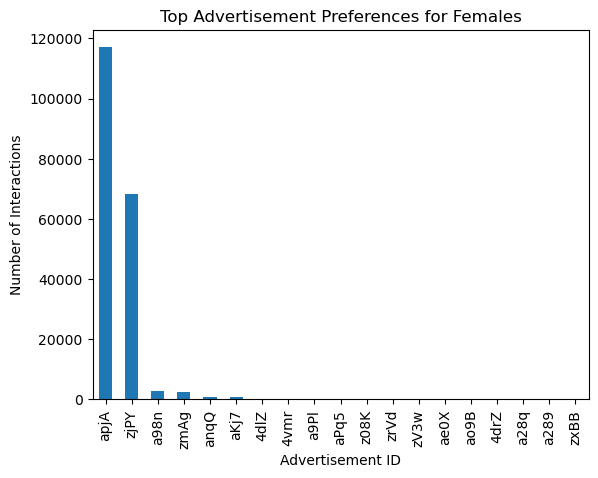

In [129]:
# Example for plotting the top preferences for females
top_product_preferences_female = top_product_preferences['female'].sort_values(ascending=False)
top_product_preferences_female.plot(kind='bar', title='Top Advertisement Preferences for Females')
plt.xlabel('Advertisement ID')
plt.ylabel('Number of Interactions')
plt.show()


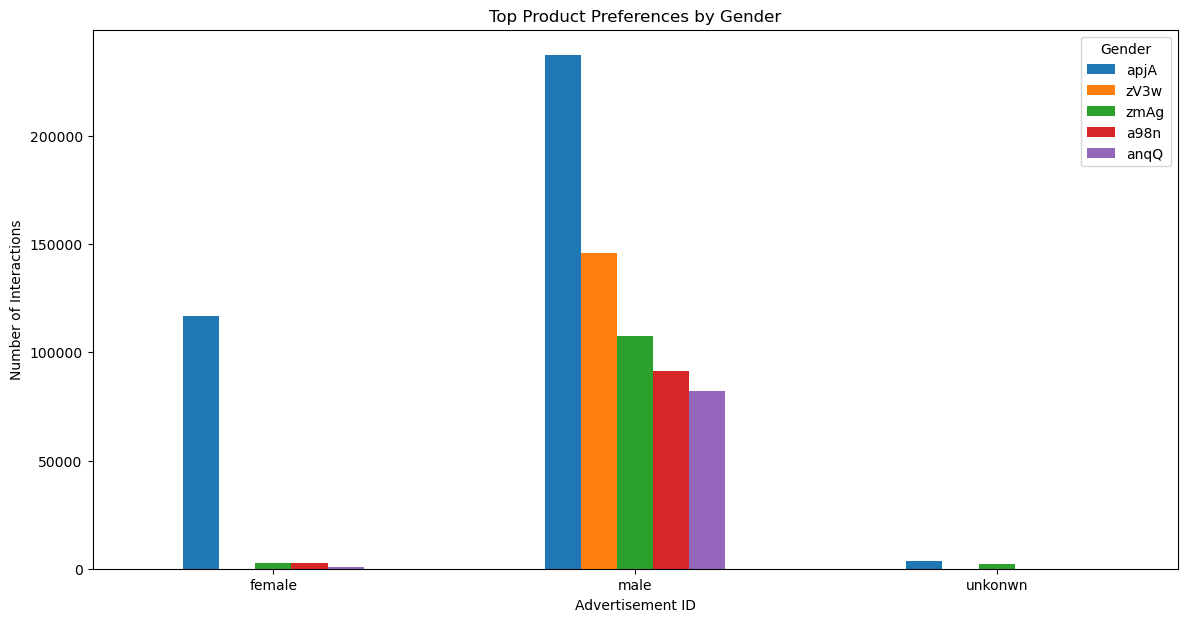

In [180]:
# Given that we have the DataFrame 'product_preferences' that contains the count of interactions per 'adv_id' per gender
# Let's first identify the top advertisements overall to see which are the most interacted with regardless of gender
top_ads_overall = product_preferences.sum(axis=0).nlargest(5).index

# Now we filter our DataFrame to only include these top ads
top_product_preferences_overall = product_preferences[top_ads_overall]

# Plotting the top product preferences for all genders on the same graph
import matplotlib.pyplot as plt

top_product_preferences_overall.plot(kind='bar', figsize=(14, 7))
plt.title('Top Product Preferences by Gender')
plt.xlabel('Advertisement ID')
plt.ylabel('Number of Interactions')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Keep the x-ticks vertical for readability
plt.show()



### Preference Analysis according to CTR:

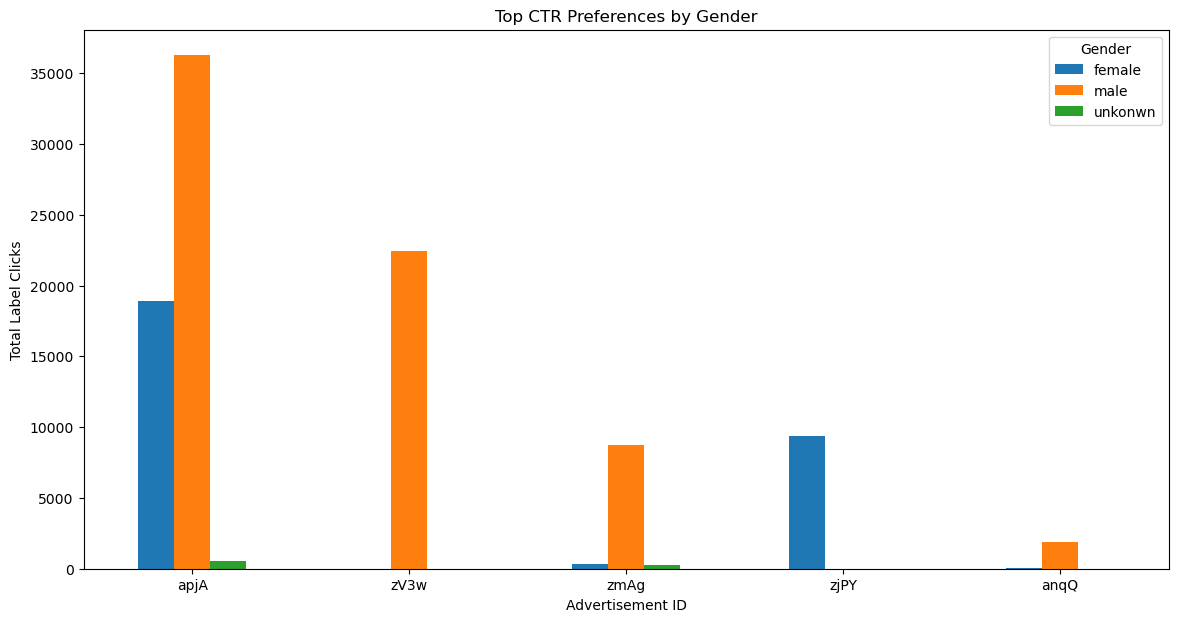

In [181]:
# Assuming 'product_preferences' DataFrame exists and has been created similarly as before
# This time we will consider the 'Label_Click' as a proxy for CTR interactions

# Aggregate the 'Label_Click' by 'adv_id' and 'gender' to get the sum of clicks per ad per gender
ctr_preferences = data.groupby(['adv_id', 'gender'])['Label_Click'].sum().unstack(fill_value=0)

# Identify the top advertisements overall based on CTR
top_ads_ctr_overall = ctr_preferences.sum(axis=1).nlargest(5).index

# Now filter the DataFrame to include only these top ads
top_ctr_preferences_overall = ctr_preferences.loc[top_ads_ctr_overall]

# Plotting the top CTR preferences for all genders on the same graph
import matplotlib.pyplot as plt

top_ctr_preferences_overall.plot(kind='bar', figsize=(14, 7))
plt.title('Top CTR Preferences by Gender')
plt.xlabel('Advertisement ID')
plt.ylabel('Total Label Clicks')
plt.legend(title='Gender')
plt.xticks(rotation=0)  # Keep the x-ticks vertical for readability
plt.show()



## A/B Testing:

In [182]:
import pandas as pd
from scipy.stats import ttest_ind

# Choose a specific campaign ID and gender for filtering
campaign_id = 'apjA'
gender = 'female'

# Filter data based on campaign ID and gender
filtered_data = data[(data['adv_id'] == campaign_id) & (data['gender'] == gender)]

# Print the first few rows of the filtered data to verify
print(filtered_data.head())

# Perform t-test to compare metrics between groups
group_A = filtered_data[filtered_data['Label_Click'] == 0]  # Group A: 'Label_Click' is 0
group_B = filtered_data[filtered_data['Label_Click'] == 1]  # Group B: 'Label_Click' is 1

# Extract the metric you want to compare (e.g., 'money')
metric_A = group_A['money']
metric_B = group_B['money']

# Perform t-test to compare means of the two groups
t_stat, p_value = ttest_ind(metric_A, metric_B, equal_var=False)

# Print the results
print("===============================================================================")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


   txn_user_id       txn_timestamp      View_timestamp      Click_tmestamp  \
0        000NK 2017-08-01 12:02:56 2017-08-01 12:02:58                 NaT   
2        001RE 2017-08-01 11:54:37 2017-08-01 11:54:59                 NaT   
3        005KA 2017-08-01 18:35:12 2017-08-01 18:36:25 2017-08-01 18:36:28   
10       00Bx6 2017-08-01 17:05:17 2017-08-01 17:05:29                 NaT   
14       00EM2 2017-08-01 12:42:23 2017-08-01 12:43:16                 NaT   

   adv_id  money network kind_pay store_id  industry  gender  Label_Click  \
0    apjA   1600    wifi     4JBo    bpOLD      1000  female            0   
2    apjA   1100     3g+     4JBo     VnOA      1000  female            0   
3    apjA   6400     3g+     4JBo    LprL8      1000  female            1   
10   apjA   1860      2g     4JBo     1JRX      1204  female            0   
14   apjA   1100    wifi     4JBo     9K8b      1000  female            0   

   View_delay_minutes Click_delay_minutes  hour day_of_week  hour_of

Here's a breakdown of the results:

The filtered data contains transactions related to the campaign ID 'apjA' and with a gender of 'female'.
- The t-test was performed on the 'money' metric between two groups:
    - Group A: Transactions where 'Label_Click' is 0 (not clicked)
    - Group B: Transactions where 'Label_Click' is 1 (clicked)

- The t-statistic is approximately -2.75, indicating a difference in means between the two groups.
- The p-value is approximately 0.0059, which is less than the common significance level of 0.05. This suggests that there is statistically significant evidence to reject the null hypothesis, indicating a difference in 'money' between the two groups.

These results indicate that there is a statistically significant difference in the 'money' metric between transactions where users clicked ('Label_Click' = 1) and transactions where users did not click ('Label_Click' = 0) within the specified campaign and gender group.

#### example

In [183]:
import pandas as pd
from scipy.stats import ttest_ind

# Choose a different campaign ID and gender for filtering
campaign_id = 'xyzB'  # Replace with your desired campaign ID
gender = 'male'  # Replace with 'female', 'male', or 'unknown' based on your data

# Filter data based on campaign ID and gender
filtered_data = data[(data['adv_id'] == campaign_id) & (data['gender'] == gender)]

# Print the first few rows of the filtered data to verify
print(filtered_data.head())

# Perform t-test to compare metrics between groups
group_A = filtered_data[filtered_data['network'] == 'wifi']  # Group A: 'network' is wifi
group_B = filtered_data[filtered_data['network'] == '4g']  # Group B: 'network' is 3g+

# Extract the metric you want to compare (e.g., 'money')
metric_A = group_A['money']
metric_B = group_B['money']

# Perform t-test to compare means of the two groups
t_stat, p_value = ttest_ind(metric_A, metric_B, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


Empty DataFrame
Columns: [txn_user_id, txn_timestamp, View_timestamp, Click_tmestamp, adv_id, money, network, kind_pay, store_id, industry, gender, Label_Click, View_delay_minutes, Click_delay_minutes, hour, day_of_week, hour_of_day, session_engagement]
Index: []
T-statistic: nan, P-value: nan


- If your filtered DataFrame is empty, it means that there are no rows in your dataset that match the specified criteria (campaign ID 'xyzB' and gender 'male'). As a result, when you try to perform the t-test on empty data, you get NaN (Not a Number) values for the t-statistic and p-value because there is no data to calculate these statistics.

- To resolve this issue, you should ensure that your dataset contains data that matches the filtering criteria specified in the code. Check your dataset or adjust the filtering criteria to include valid data for the analysis.

#### example

In [185]:
import pandas as pd
from scipy.stats import ttest_ind

# Choose a specific campaign ID and gender for filtering
campaign_id = 'apjA'
gender = 'female'

# Filter data based on campaign ID and gender
filtered_data = data[(data['adv_id'] == campaign_id) & (data['gender'] == gender)]

# Print the first few rows of the filtered data to verify
print(filtered_data.head())

# Perform t-test to compare metrics between groups
group_A = filtered_data[filtered_data['Label_Click'] == 0]  # Group A: 'Label_Click' is 0
group_B = filtered_data[filtered_data['Label_Click'] == 1]  # Group B: 'Label_Click' is 1

# Extract the metric you want to compare (e.g., 'money')
metric_A = group_A['money'].astype(float)  # Convert to float if necessary
metric_B = group_B['money'].astype(float)  # Convert to float if necessary

# Perform t-test to compare means of the two groups
t_stat, p_value = ttest_ind(metric_A, metric_B, equal_var=False)

# Print the results
print("===============================================================================")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


   txn_user_id       txn_timestamp      View_timestamp      Click_tmestamp  \
0        000NK 2017-08-01 12:02:56 2017-08-01 12:02:58                 NaT   
2        001RE 2017-08-01 11:54:37 2017-08-01 11:54:59                 NaT   
3        005KA 2017-08-01 18:35:12 2017-08-01 18:36:25 2017-08-01 18:36:28   
10       00Bx6 2017-08-01 17:05:17 2017-08-01 17:05:29                 NaT   
14       00EM2 2017-08-01 12:42:23 2017-08-01 12:43:16                 NaT   

   adv_id  money network kind_pay store_id  industry  gender  Label_Click  \
0    apjA   1600    wifi     4JBo    bpOLD      1000  female            0   
2    apjA   1100     3g+     4JBo     VnOA      1000  female            0   
3    apjA   6400     3g+     4JBo    LprL8      1000  female            1   
10   apjA   1860      2g     4JBo     1JRX      1204  female            0   
14   apjA   1100    wifi     4JBo     9K8b      1000  female            0   

   View_delay_minutes Click_delay_minutes  hour day_of_week  hour_of

The calculated t-statistic and p-value are important statistical measures obtained from the t-test. In your case, the t-statistic is approximately -2.75, and the p-value is approximately 0.00594.

Here's what these values mean in the context of a t-test:

- T-statistic: This value measures the difference between the means of two groups relative to the variation within the groups. In simple terms, it tells you how significant the difference is between the two groups. A higher absolute value of the t-statistic indicates a more significant difference between the groups.

- P-value: This value indicates the probability of observing the data (or more extreme results) under the assumption that the null hypothesis is true. In hypothesis testing, a smaller p-value (usually below a chosen significance level, e.g., 0.05) suggests stronger evidence against the null hypothesis. In your case, the p-value is quite small (0.00594), indicating that the observed difference in the 'money' metric between the two groups (campaign ID 'apjA' for females) is statistically significant at a typical significance level of 0.05.

In summary, based on the results of the t-test:

The difference in the 'money' metric between the two groups (campaign ID 'apjA' for females) is statistically significant.
The negative t-statistic indicates that the mean 'money' value for one group is lower than the mean 'money' value for the other group.

## The Ened for Part One and Look at Part 2